# Web Scraping for Indeed.com & Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary classifier.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title, and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use a random forest classifier, as well as another classifier of your choice; either logistic regression, SVM, or KNN. 

- **Question**: Why would we want this to be a classification problem?
- **Answer**: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Set up a request (using requests) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)
The URL here has many query parameters
- q for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- l for a location
- start for what result number to start on

In [2]:
URL = "https://www.indeed.com/jobs?q=data+scientist+$20000&start=10"
    #not specifying location in URL, to scrape jobs from all over US
    #just specifying data scientist, $20,000 salary
    #starting on second page of results

In [3]:
import requests
import bs4
from bs4 import BeautifulSoup

In [4]:
import time
from time import sleep

In [5]:
import json

In [6]:
import urllib

In [7]:
url = "https://www.indeed.com/jobs?q=data+scientist+%2420000&l=Washington%2C+DC" #results for DC

In [8]:
html = urllib.urlopen(url).read() #trying out urllib 

In [9]:
soupman = BeautifulSoup(html, "html.parser", from_encoding = "utf-8") #trying out BeautifulSoup

In [10]:
r = requests.get("https://www.indeed.com/jobs?q=data+scientist+%2420000&l=Washington%2C+DC") #trying out requests

In [11]:
#soupman2 = BeautifulSoup(r.text, "html.parser")

In [12]:
#soupman2

In [13]:
soupman #looking at the html object

<!DOCTYPE html>\n\n<html lang="en">\n<head>\n<meta content="text/html;charset=unicode-escape" http-equiv="content-type">\n<!-- pll --><script src="/s/f8338b4/en_US.js" type="text/javascript"></script>\n<link href="/s/1643fa5/jobsearch_all.css" rel="stylesheet" type="text/css">\n<link href="/m/jobs?q=data+scientist+%2420000&amp;l=Washington%2C+DC" media="handheld" rel="alternate">\n<script type="text/javascript">\n    \n    if (typeof window['closureReadyCallbacks'] == 'undefined') {\n        window['closureReadyCallbacks'] = [];\n    }\n\n    function call_when_jsall_loaded(cb) {\n        if (window['closureReady']) {\n            cb();\n        } else {\n            window['closureReadyCallbacks'].push(cb);\n        }\n    }\n</script>\n<script src="/s/0568c73/jobsearch-all-compiled.js" type="text/javascript"></script>\n<script type="text/javascript">\nvar pingUrlsForGA = [];\n\nvar searchUID = '1bddhep6k5umba1b';\nvar tk = '1bddhep6k5umba1b';\n\nvar loggedIn = false;\nvar myindeed = 

Let's look at one result more closely. A single result looks like
```JSON
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&campaignid=serp-linkcompanyname&fromjk=2480d203f7e97210&jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a nobr element inside of a td element with class='snip.
- The title of a job is in a link with class set to jobtitle and a data-tn-element="jobTitle.
- The location is set in a span with class='location'.
- The company is set in a span with class='company'.

## Write 4 functions to extract each item: location, company, job, and salary.¶
Example
```python
def extract_location_from_result(result):
    return result.find ...
```

##### - Make sure these functions are robust and can handle cases where the data/field may not be available.
>- Remember to check if a field is empty or None for attempting to call methods on it
>- Remember to use try/except if you anticipate errors.

- **Test** the functions on the results above and simple examples

In [14]:
#function to extract location from a html object
def location_extractor(result): #takes single argument
    locationlocationlocation = [] #declare empty list
    for item in result.find_all(name = "span", attrs = {"class": "location"}): #iterating over instances of html tags for location
        try:
            locationlocationlocation.append(item.text) #appending each location to list
            #locationlocationlocation.append(item.find(name = "span", attrs = {"class":"location"}).text)
        except: #creating exception for errors/null entries
            pass
    return locationlocationlocation #function will return list of locations
        

In [15]:
location_extractor(soupman) #calling the location function on the html object from above

[u'Crystal City, VA',
 u'Washington, DC 20005',
 u'Bethesda, MD',
 u'Washington, DC 20036 (Downtown area)',
 u'Falls Church, VA',
 u'Washington, DC',
 u'Arlington, VA',
 u'McLean, VA 22108',
 u'Washington, DC',
 u'Crystal City, VA',
 u'Washington, DC 20005 (Logan Circle area)',
 u'Washington, DC',
 u'Washington, DC',
 u'Silver Spring, MD 20910',
 u'Washington, DC 20024']

In [16]:
#function to extract company from a html object
def company_extractor(result):
    c_list = []
    for item in result.find_all(name = "span", attrs = {"class": "company"}):
        try:
            c_list.append(item.text)
        except:
            pass
    return c_list

In [17]:
company_extractor(soupman)

[u'\n\n        Novetta',
 u'\n\n        The Washington Post',
 u'\n    Pharmerit International',
 u'\n\n\n        Grant Thornton\n',
 u'\n\n\n        ASRC Federal\n',
 u'\n\n\n        Jobspring Partners\n',
 u'\n\n\n        Sotera Defense Solutions, Inc.\n',
 u'\n\n\n        Leidos\n',
 u'\n\n\n        The World Bank Group\n',
 u'\n\n\n        Novetta\n',
 u'\n\n\n        IBM\n',
 u'\n\n    Civis Analytics\n',
 u'\n\n\n        NPR\n',
 u'\n    RedJack, LLC',
 u'\n\n        Mitre Corporation']

In [18]:
def job_extractor(result):
    JOBS_list = []
    for item in result.find_all(name = "h2", attrs = {"class": "jobtitle"}):
        try:
            JOBS_list.append(item.text)
        except:
            pass
            #JOBS_list.append("NA")
    return JOBS_list

In [19]:
job_extractor(soupman)

[u'\nData Scientist\n',
 u'\nJunior Data Scientist, Python\n',
 u'\nData Scientist (Math background)\n',
 u'\nData Scientist\n',
 u'\nData Scientist\n',
 u'\nData Scientist\n',
 u'\nData Scientist\n',
 u'\nAdvanced Analytics Data Scientist\n',
 u'\nSenior Applied Data Scientist - Census\n',
 u'\nData Scientist / Digital Analyst\n']

In [20]:
def cash_extractor(result):
    cash_list = []
    for item in result.find_all(name = "td", attrs = {"class": "snip"}): #iterating over snip objects
        try:
            cash_list.append(item.find(name="nobr").text) #not appending items, but items tagged "nobr"
        except:
            pass
    return cash_list

In [21]:
cash_extractor(soupman) #here we have our first hint that salaries will not come up all that frequently

[u'$150,000 - $250,000 a year']

In [32]:
#function to extract job description from html object
def sum_extractor(result):
    summary_list = []
    for item in result.find_all(name = "span", attrs = {"class": "summary"}):
        try:
            summary_list.append(item.text)
        except:
            pass
    return summary_list


# try:
#     description = item.find(name = "span", attrs = {"class":"summary"}).text
# except:
#     description = "NA"

In [33]:
sum_extractor(soupman)

[u'Our customer uses their data warehouse as the foundation for a variety of applications and analytical workflows supporting intelligence analysis, threat tiering...',
 u'Washington Post is looking for passionate Data Scientists to join our Big Data Analytics team. Data scientist will utilize the data from the platform and design...',
 u'Due to the continued growth of our consulting practice, Pharmerit International is seeking a Scientist to join our team of exceptional researchers....',
 u'\nQuery and mine large data sets to discover patterns, examine data and filter for targeted information using traditional/exploratory, as well as advanced...',
 u'\nJunior Data Scientist, Python. Junior Data Scientist (Java and Python). Experience extracting data from websites using Python....',
 u'\nThe data scientist will develop and implement new methods. The senior data scientist will be working on research, development, and methodology....',
 u'\nSotera Defense Solutions is seeking candidates 

In [22]:
#this was a way to iterate over all the pages of data science jobs on indeed and append individual results to a list
#better to break it down by location, title, etc of individual result, and instead of appending to list to go 
#straight to creating a dataframe
#  jobsjobsjobs = []

#  for num in range(10, 20000, 10:)
#      r = requests.get("https://www.indeed.com/jobs?q=data+scientist&start={}".format(num))
#      soupman = BeautifulSoup(r.text)
# #     jobs = soup.find_all(name="div", attrs={"class":"  row  result"})
    
# #     for job in jobs:
#         jobsjobsjobs.append(job.text)

In [24]:
#as stated above, going through pages of indeed results for data scientist jobs, and appending individual results
#to list of jobs. this ultimately was not the most efficient way to approach the problem

jobsjobsjobs = []
#location = []
#comp = []
#title = []
#money = []

for num in range(10, 30, 10):
    r = requests.get("https://www.indeed.com/jobs?q=data+scientist&start={}".format(num))
    soupman3 = BeautifulSoup(r.text, "html.parser")
    #jobs = soupman.find_all(name="div", attrs={"class":"row result"})
    for item in soupman3.find_all(name="div", attrs={"class":" row result"}):
        try:
            jobsjobsjobs.append(item.text)
        except:
            jobsjobsjobs.append("NA")

In [25]:
jobsjobsjobs

[u'\n\nGlobal Clinical R&D Operations - Data Scientist - Summer Int...\n\n\n\n\n        Celgene Corporation\n\n\n - \n111 reviews\n - New Jersey\n\n\n\n\n\nThe incumbent will get an opportunity to work with a cross functional team of Clinical operations members and data scientists....\n\n\n3 days ago   -  save job - more...window[\'result_0ae46a24beab0750\'] = {"showSource": false, "source": "Celgene Corporation", "loggedIn": false, "showMyJobsLinks": true,"undoAction": "unsave","relativeJobAge": "3 days ago","jobKey": "0ae46a24beab0750", "myIndeedAvailable": true, "tellAFriendEnabled": false, "showMoreActionsLink": true, "resultNumber": 0, "jobStateChangedToSaved": false, "searchState": "q=data scientist&amp;start=10", "basicPermaLink": "https://www.indeed.com", "saveJobFailed": false, "removeJobFailed": false, "requestPending": false, "notesEnabled": true, "currentPage" : "serp", "sponsored" : false,"reportJobButtonEnabled": false, "showMyJobsHired": false, "showSaveForSponsored": fa

In [26]:
import pandas as pd

In [27]:
import re #regex black magic

In [167]:
kdata = pd.DataFrame(columns=["title", "company", "location", "salary", "description"]) #creating empty df

In [153]:
jdata412 = pd.DataFrame(columns=["title", "company", "location", "salary", "description"]) #creating another empty df

In [168]:
#my job finder function!!
#builds out on extractor functions from above
#iterates over pages of results, passing in the page number using {}format
#then, within each page, iterates over each individual result
#for each result, extracts location, title, company, salary, description
#each of those values are declared as variables, and assigned as the values
#for a new row in the previously created dataframe
#in between each individual result, the function "sleeps" for 200 milliseconds
#it returns the shape of the dataframe (how many results, duplicates included)
#and the first 5 rows

def job_finder(max_results = 990):
    for num in range(10, 20000, 10):
        r = requests.get("https://www.indeed.com/jobs?q=data+scientist&start={}".format(num))
        soupman3 = BeautifulSoup(r.text, "html.parser")
        #jobs = soupman.find_all(name="div", attrs={"class":"row result"})
        for item in soupman3.find_all(name="div", attrs={"class":" row result"}):
    #         print item
            #try:
                #jobsjobsjobs.append(item.text)
            #except:
                #jobsjobsjobs.append("NA")
            #try:
                #title = item.find(name="span", attrs={"class":"jobtitle"}).text
            try:
    #             locale = item.find(name="span", attrs={"itemprop":"location"}).text
                location = item.find(name="span", attrs={"class":"location"}).text
            except:
                location = 0
            try:
                title = item.find(name="h2", attrs={"class":"jobtitle"}).text
            except:
                title = "NA"
            try: 
                company = item.find(name = "span", attrs = {"class":"company"}).text
            except:
                company = "NA"
            try:
                description = item.find(name = "span", attrs = {"class":"summary"}).text
            except:
                description = "NA"

            for i in item.find_all(name = "td", attrs = {"class": "snip"}):
                try:
                    salary = i.find(name="nobr").text
                except:
                    salary = "NA"
            kdata.loc[len(kdata)] = [title, company, location, salary, description]
            sleep(.200)
    kdata.drop_duplicates(inplace = True)
    return kdata.shape, kdata.head()

In [169]:
job_finder()

((721, 5),
                 title                               company                                 location salary                                                                                                                                                            description
 0  \nData Scientist\n   \n\n\n        Booz Allen Hamilton\n                               McLean, VA     NA  \nAbility to build machine learning models in R and Python to identify risks and provide in-depth analysis. Leverage technical and analytical expertise to explore...
 1  \nData Scientist\n             \n\n\n        Microsoft\n                        Redmond, WA 98052     NA   \nTo be successful in this role, you must be able to use rigorous analytical techniques combined with expert data skills to develop highly scalable and efficient...
 2  \nData Scientist\n                 \n\n\n        Intel\n  Phoenix, AZ 85018 (Camelback East area)     NA  \nUses predictive modeling, statistics, Machine Lea

In [171]:
kdata[kdata.salary != "NA"]

title                                               company                                    location                      salary                                                                                                                                                            description
79                                                    \nData Scientist\n           \n\n\n        Central Intelligence Agency\n                              Washington, DC   $62,338 - $119,794 a year      \nData Scientists organize and interpret Big Data to inform US decision makers, drive successful operations and shape CIA technology and resource investments....
82                                                    \nData Scientist\n                                   \n\n    NxT Level\n                                 Seattle, WA  $125,000 - $160,000 a year                            \nWe are looking for a passionate Data Scientists that are looking to deep dive into a Seattle, WA company that's growing exponentially....
110                                                   \nData Scientist\n                 \n\n\n        Workbridge Associates\n                              Washington, DC  $100,000 - $150,000 a year          \nA leading provider of data and technology for companies that support and promote free enterprise is looking to bring on a Data Scientist with management...
157                                                   \nData Scientist\n            \n\n    Computer Enterprises, Inc. (CEI)\n                            Philadelphia, PA             $160,000 a year                       \nExcel, SQL, SAS, R, and Tableau) through determination of appropriate analytic approach (sample data analysis, trending, regression, etc.)....
210                                  \nData Scientist (Consumer Loans)\n                                    \n\n    Lendmart\n                       Los Angeles, CA 90036              $55,000 a year        \nUndertaking knowledge discovery and data mining in large transactional datasets. Performing data extraction, transformation and loading from multiple data...
286                                    \nData Scientist II, Sequencing\n                           \n\n    Enterprise Select\n                        Pleasanton, CA 94588             $120,000 a year  \nThe successful candidate must be excited about learning new concepts from chemistry, physics, algorithm development and electrical engineering and applying them...
287                                                     \nDATA ANALYST\n           \n\n\n        HRA/DEPT OF SOCIAL SERVICES\n                               Manhattan, NY    $57,969 - $62,000 a year   \nFor Assignment Level I (only physical, biological and environmental sciences and public health) A master's degree from an accredited college or university with...
312                                                   \nData Scientist\n                                 \n\n    Flexton inc\n                             Santa Clara, CA                 $50 an hour   \nData science toolkits, such as R, Weka, NumPy, MatLab:. ) for Data Scientist position in Santa Clara, CA. Experience with common data science toolkits, such as...
319                                                   \nData Scientist\n                                      \n\n    indify\n                                New York, NY   $90,000 - $170,000 a year                      \nIndify data scientists contribute to all aspects of the platform and are a vital part of envisioning and creating the future of our product....
322                                                   \nData Scientist\n                       \n\n    Gunther Douglas, Inc.\n                              Washington, DC  $110,000 - $140,000 a year  \nFive (5) or more years of relevant advanced analytics experience – strong proficiency in advanced statistical, predictive and machine learning techniques (agent...
361  \nMachine learning / AI / Restful AP

In [172]:
kdata.to_csv("indeed_data_stop.csv", index = False, encoding = "utf-8")

In [154]:
# jobsjobsjobs = []
# location = []
# comp = []
# title = []
#money = []

for num in range(10, 20000, 10):
    r = requests.get("https://www.indeed.com/jobs?q=data+scientist&start={}".format(num))
    soupman3 = BeautifulSoup(r.text, "html.parser")
    #jobs = soupman.find_all(name="div", attrs={"class":"row result"})
    for item in soupman3.find_all(name="div", attrs={"class":" row result"}):
#         print item
        #try:
            #jobsjobsjobs.append(item.text)
        #except:
            #jobsjobsjobs.append("NA")
        #try:
            #title = item.find(name="span", attrs={"class":"jobtitle"}).text
        try:
#             locale = item.find(name="span", attrs={"itemprop":"location"}).text
            location = item.find(name="span", attrs={"class":"location"}).text
        except:
            location = 0
        try:
            title = item.find(name="h2", attrs={"class":"jobtitle"}).text
        except:
            title = "NA"
        try: 
            company = item.find(name = "span", attrs = {"class":"company"}).text
        except:
            company = "NA"
        try:
            description = item.find(name = "span", attrs = {"class":"summary"}).text
        except:
            description = "NA"
       
        for i in item.find_all(name = "td", attrs = {"class": "snip"}):
            try:
                salary = i.find(name="nobr").text
            except:
                salary = "NA"
        jdata412.loc[len(jdata412)] = [title, company, location, salary, description]
        sleep(.200)

In [159]:
jdata412.drop_duplicates(inplace = True)

In [160]:
jdata412.shape

(736, 5)

In [161]:
jdata412.to_csv("indeed_data_7.csv", index = False, encoding = "utf-8") #saving dataframe to csv

In [162]:
sal_412 = jdata412[jdata412.salary != "NA"] #filtering for only those entries with salary data

In [164]:
sal_412 #checking out salary data

title                                               company                                    location                      salary                                                                                                                                                            description
61                              \nData Scientist (Math background)\n                    \n\n\n        Jobspring Partners\n                              Washington, DC  $150,000 - $250,000 a year      \nThe data scientist will develop and implement new methods. Generous base salary and bonuses, Full health benefits, generous 401k match plan, flexible Friday...
76                                                \nData Scientist\n           \n\n\n        Central Intelligence Agency\n                              Washington, DC   $62,338 - $119,794 a year      \nData Scientists organize and interpret Big Data to inform US decision makers, drive successful operations and shape CIA technology and resource investments....
77                                                \nData Scientist\n                                   \n\n    NxT Level\n                                 Seattle, WA  $125,000 - $160,000 a year                            \nWe are looking for a passionate Data Scientists that are looking to deep dive into a Seattle, WA company that's growing exponentially....
108                                               \nData Scientist\n                 \n\n\n        Workbridge Associates\n                              Washington, DC  $100,000 - $150,000 a year          \nA leading provider of data and technology for companies that support and promote free enterprise is looking to bring on a Data Scientist with management...
150                                               \nData Scientist\n            \n\n    Computer Enterprises, Inc. (CEI)\n                            Philadelphia, PA             $160,000 a year                       \nExcel, SQL, SAS, R, and Tableau) through determination of appropriate analytic approach (sample data analysis, trending, regression, etc.)....
154                                               \nData Scientist\n                                        \n\n    Keyo\n                               Palo Alto, CA  $120,000 - $200,000 a year  \nWe’re looking for talented junior and senior data scientists to join our diverse and fast-growing data team. As a data scientist, you’ll build and implement the...
213                              \nData Scientist (Consumer Loans)\n                                    \n\n    Lendmart\n                       Los Angeles, CA 90036              $55,000 a year        \nUndertaking knowledge discovery and data mining in large transactional datasets. Performing data extraction, transformation and loading from multiple data...
217                                               \nData Scientist\n               \n\n\n        Oliver James Associates\n                                New York, NY             $160,000 a year     \nIntegrate and mine large data sets, connecting data from disparate sources to identify insights and patterns using predictive and prescriptive analytics, and...
256                                                 \nDATA ANALYST\n           \n\n\n        HRA/DEPT OF SOCIAL SERVICES\n                               Manhattan, NY    $57,969 - $62,000 a year   \nFor Assignment Level I (only physical, biological and environmental sciences and public health) A master's degree from an accredited college or university with...
257                                               \nData Scientist\n                          \n\n    Platinum Solutions\n                                 Houston, TX   $80,000 - $120,000 a year     \nThe Data Scientist works with the advanced analytics team on data and business intelligence resources to build and deliver advanced analytics capabilities to...
288                                \nData Scientist II, Sequencing\n             

In [48]:
jdata.to_csv("indeed_data.txt", index = False, encoding = "utf-8") #saving dataframe to csv

In [53]:
jdata #ugh is only 891 rows ... will only let me scrape 1000 jobs at a time (this was my first (successful) scrape)

title  \
0    \nGlobal Clinical R&D Operations - Data Scient...   
1                                   \nData Scientist\n   
2                           \nData Scientist (MACSM)\n   
3                                   \nData Scientist\n   
4                                   \nData Scientist\n   
5                                   \nData Scientist\n   
6                                   \nData Scientist\n   
7                                   \nData Scientist\n   
8                                   \nData Scientist\n   
9                                   \nData Scientist\n   
10                                  \nData Scientist\n   
11                                  \nData Scientist\n   
12                           \nData Scientist (i360)\n   
13             \nData Scientist-Analytics Innovation\n   
14                                  \nData Scientist\n   
15                                  \nData Scientist\n   
16                \nData Scientist / Digital Analyst\n   
17                                  \nData Scientist\n   
18               \nData Scientist (all levels) (NCI)\n   
19                                  \nData Scientist\n   
20                                  \nData Scientist\n   
21                                  \nData Scientist\n   
22                        \nData Analytics Scientist\n   
23                                  \nData Scientist\n   
24                                  \nData Scientist\n   
25                       \nData Science Professional\n   
26            \nData Scientist / Database Specialist\n   
27            \nData Scientist, Predictive Analytics\n   
28                                  \nData Scientist\n   
29      \nMachine Learning Engineer - Data Scientist\n   
..                                                 ...   
861                  \nBehavioral Research Scientist\n   
862                       \nBioinformatics Analyst I\n   
863                     \nStatistician/Mathematician\n   
864                               \nResearch Analyst\n   
865                               \nResearch Analyst\n   
866         \nMachine Learning Accelerator Architect\n   
867    \nAccenture Analytics-Data Science Consultant\n   
868  \nQuantitative Finance Analyst - Bankcard Mode...   
869                                   \nStatistician\n   
870                            \nLead Data Scientist\n   
871               \nSenior Healthcare Data Scientist\n   
872                                 \nData Scientist\n   
873                 \nProvider Data Analyst (R00511)\n   
874                         \nCS Data Scientist, Mid\n   
875  \nQuantitative Analyst – Counterparty Credit R...   
876     \nPrinciple Engineer - Big Data, Big Compute\n   
877                          \nSenior Data Scientist\n   
878                                 \nData Scientist\n   
879                    \nBig Data Technical Intern I\n   
880                  \nSAS Data Analyst/Statistician\n   
881                      \nData Analytics Instructor\n   
882                        \nFirmware Data Scientist\n   
883    \nSenior Scientist, Oncology Target Discovery\n   
884            \nMachine Learning Research Scientist\n   
885                                 \nData Scientist\n   
886               \nResearch Scientist, Advertisting\n   
887              \nData Scientist - Machine Learning\n   
888                                 \nData Scientist\n   
889                                 \nSenior Analyst\n   
890    \nFinancial, Data Modeling & Research Analyst\n   

                                               company  \
0                  \n\n\n        Celgene Corporation\n   
1                               \n\n\n        Talyst\n   
2                 \n\n\n        Celestar Corporation\n   
3                  \n\n\n        Booz Allen Hamilton\n   
4            \n\n    Whiteboard Federal Technologies\n   
5                          \n\n\n        Movable Ink\n   
6                   \n\n\n        Harris Corpo

In [506]:
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', 800) #changing amt of visible information so I can see full summary 


In [67]:
jdata

title                                                       company                                            location                      salary                                                                                                                                                            description
0    \nGlobal Clinical R&D Operations - Data Scientist - Summer Int...\n                           \n\n\n        Celgene Corporation\n                                          New Jersey                          NA                                    \nThe incumbent will get an opportunity to work with a cross functional team of Clinical operations members and data scientists....
1                                                     \nData Scientist\n                                        \n\n\n        Talyst\n                   Kirkland, WA 98034 (Juanita area)                          NA             \nThis position willleverage data visualization, machine learning, and other data sciencetechniques to tell compelling stories and influence decisions....
2                                             \nData Scientist (MACSM)\n                          \n\n\n        Celestar Corporation\n                                     Springfield, VA                          NA            \nInitiate the efficient implementation of methods, tools, algorithms, including preliminary data exploration, data visualization and preparation, model...
3                                                     \nData Scientist\n                           \n\n\n        Booz Allen Hamilton\n                                          McLean, VA                          NA  \nAbility to build machine learning models in R and Python to identify risks and provide in-depth analysis. Leverage technical and analytical expertise to explore...
4                                                     \nData Scientist\n                     \n\n    Whiteboard Federal Technologies\n                                         Herndon, VA                          NA             \nAbility to act as bridge between data scientists and analysts. Our ideal candidate has a firm grounding in data science and is a strong communicator,...
5                                                     \nData Scientist\n                                   \n\n\n        Movable Ink\n                                        New York, NY                          NA   \nAs a Data Scientist at Movable Ink, you’ll be working on the newest product research area of Machine Learning, analyzing the abundance of data at our disposal....
6                                                     \nData Scientist\n                            \n\n\n        Harris Corporation\n                                 Chantilly, VA 20151                          NA                           \n3+ years of experience with machine learning, data mining, statistics, or graph algorithms. Building prototypes for data visualization....
7                                                     \nData Scientist\n                                  \n\n\n        Lam Research\n                                  Tualatin, OR 97062                          NA    \nIn mathematics, statistics, physics, chemistry, computer science, electrical engineering, chemical engineering, or material science with at least two years of...
8                                                     \nData Scientist\n                                     \n\n\n        JW Player\n                   New York, NY 10018 (Clinton area)                          NA  \nProvide expertise on machine learning concepts for the broader Data team and inspire the adoption of data science across the entire breadth of our organization....
9                                                     \nData Scientist\n                                  \n\n\n        Prosperoware\n                       Chicago, IL 60601 (Loop area)                          NA   \nExperience with data mining,

In [51]:
# jdata2 = pd.DataFrame(columns=["title", "company", "location", "salary", "description"])

# for num in range(2000, 3000, 10):
#     r = requests.get("https://www.indeed.com/jobs?q=data+scientist&start={}".format(num))
#     soupman4 = BeautifulSoup(r.text, "html.parser")
#     #jobs = soupman.find_all(name="div", attrs={"class":"row result"})
#     for item in soupman4.find_all(name="div", attrs={"class":" row result"}):
# #         print item
#         #try:
#             #jobsjobsjobs.append(item.text)
#         #except:
#             #jobsjobsjobs.append("NA")
#         #try:
#             #title = item.find(name="span", attrs={"class":"jobtitle"}).text
#         try:
# #             locale = item.find(name="span", attrs={"itemprop":"location"}).text
#             location = item.find(name="span", attrs={"class":"location"}).text
#         except:
#             location = 0
#         try:
#             title = item.find(name="h2", attrs={"class":"jobtitle"}).text
#         except:
#             title = "NA"
#         try: 
#             company = item.find(name = "span", attrs = {"class":"company"}).text
#         except:
#             company = "NA"
#         try:
#             description = item.find(name = "span", attrs = {"class":"summary"}).text
#         except:
#             description = "NA"
       
#         for i in item.find_all(name = "td", attrs = {"class": "snip"}):
#             try:
#                 salary = i.find(name="nobr").text
#             except:
#                 salary = "NA"
#         jdata2.loc[len(jdata2)] = [title, company, location, salary, description]
#         sleep(.200)

In [54]:
# jdata2

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.
- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the l=New+York and the start=10. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).
##### Complete the following code to collect results from multiple cities and starting points.
- Enter your city below to add it to the search
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [ ]:
YOUR_CITY = ''

In [ ]:
#so I don't want to do it this way ....
#When you search Indeed just for data scientist, it comes up with 23,000 jobs, right?
#but you can only click through the first 1000 results, 10 per page
#if you specify the page, you can see all of them
#but who has time for that
#so, if you look on the side, it says you can narrow down by location according to these cities:
# Location
# New York, NY (1867)
# Seattle, WA (1156)
# San Francisco, CA (955)
# Cambridge, MA (593)
# Boston, MA (567)
# Chicago, IL (458)
# San Diego, CA (397)
# Los Angeles, CA (359)
# Washington, DC (326)
# Philadelphia, PA (252)
# Atlanta, GA (250)
# Palo Alto, CA (237)
# South San Francisco, CA (226)
# San Jose, CA (222)

#accordingly, these cities should have the most listings on Indeed for data scientists. Let's look at those


In [98]:
from time import time
import logging

In [137]:
job_x_city = pd.DataFrame(columns=["title", "company", "location", "salary", "description"])
#https://www.indeed.com/jobs?q=data+science&l=Washington%2FMetro%2C+DC

In [138]:
cities = ["New+York", "Seattle", "San+Francisco", "Cambridge", "Boston", "Chicago", "San+Diego", "Los+Angeles",
          "Washington", "Philadelphia", "Atlanta", "Palo+Alto", "San+Jose", "Denver"]

In [139]:
def twerk(cities):
    for city in cities:
        for num in range(0, 900, 10):
            #rc = requests.get("https://www.indeed.com/jobs?q=data+scientist&I={}&start={}".format("city", num))
            rc = requests.get("http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}".format(city, num))
            soupman4 = BeautifulSoup(rc.text, "html.parser")
        #jobs = soupman.find_all(name="div", attrs={"class":"row result"})
            for item in soupman4.find_all(name="div", attrs={"class":" row result"}):
                try:
                    location = item.find(name="span", attrs={"class":"location"}).text
                except:
                    location = 0
                try:
                    title = item.find(name="h2", attrs={"class":"jobtitle"}).text
                except:
                    title = "NA"
                try: 
                    company = item.find(name = "span", attrs = {"class":"company"}).text
                except:
                    company = "NA"
                try:
                    description = item.find(name = "span", attrs = {"class":"summary"}).text
                except:
                    description = "NA"

                for i in item.find_all(name = "td", attrs = {"class": "snip"}):
                    try:
                        salary = i.find(name="nobr").text
                    except:
                        salary = "NA"
                job_x_city.loc[len(job_x_city)] = [title, company, location, salary, description]
                sleep(.200)
    return job_x_city.shape, job_x_city.head()

In [144]:
job_x_city.shape

(8613, 5)

In [142]:
job_x_city.duplicated().sum()

2498

In [145]:
job_x_city.drop_duplicates(inplace = True)

In [148]:
jxn_sal = job_x_city[job_x_city.salary != "NA"]

In [149]:
jxn_sal.shape

(334, 5)

In [150]:
job_x_city.shape

(6115, 5)

In [151]:
job_x_city.to_csv("indeed_data_5.csv", index = False, encoding = "utf-8")

In [152]:
jxn_sal.to_csv("indeed_data_5.5.csv", index = False, encoding = "utf-8")

In [99]:
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


In [100]:
t0 = time()
job_finder(cities)
print("done in %0.3fs" % (time() - t0))
print()

done in 3188.170s
()


In [102]:
job_x_city.shape

(21695, 5)

In [105]:
job_x_city.duplicated().sum()

20706

In [108]:
city_with_sal = job_x_city[job_x_city.salary != "NA"]

In [112]:
city_with_sal

title                                          company                                    location                      salary                                                                                                                                                            description
13                                    \nData Scientist (Math background)\n               \n\n\n        Jobspring Partners\n                              Washington, DC  $150,000 - $250,000 a year      \nThe data scientist will develop and implement new methods. Generous base salary and bonuses, Full health benefits, generous 401k match plan, flexible Friday...
21                                    \nData Scientist (Math background)\n               \n\n\n        Jobspring Partners\n                              Washington, DC  $150,000 - $250,000 a year      \nThe data scientist will develop and implement new methods. Generous base salary and bonuses, Full health benefits, generous 401k match plan, flexible Friday...
42                                     \nSr Quantitative Finance Analyst\n        \n\n    Sr Quantitative Finance Analyst\n                                New York, NY  $100,000 - $180,000 a year                         \nDeep knowledge of banking products and services. PhD in a quantitative field Mathematics, Physics, etc. (PhD in Statistics is preferred)....
107                                                     \nData Scientist\n                              \n\n    NxT Level\n                                 Seattle, WA  $125,000 - $160,000 a year                            \nWe are looking for a passionate Data Scientists that are looking to deep dive into a Seattle, WA company that's growing exponentially....
145                                                     \nData Scientist\n      \n\n\n        Central Intelligence Agency\n                              Washington, DC   $62,338 - $119,794 a year      \nData Scientists organize and interpret Big Data to inform US decision makers, drive successful operations and shape CIA technology and resource investments....
176                                                     \nData Scientist\n                                   \n\n    Keyo\n                               Palo Alto, CA  $120,000 - $200,000 a year  \nWe’re looking for talented junior and senior data scientists to join our diverse and fast-growing data team. As a data scientist, you’ll build and implement the...
202                                                     \nData Scientist\n       \n\n    Computer Enterprises, Inc. (CEI)\n                            Philadelphia, PA             $160,000 a year                       \nExcel, SQL, SAS, R, and Tableau) through determination of appropriate analytic approach (sample data analysis, trending, regression, etc.)....
212                          \nPrincipal Software Engineer, Data Science\n                      \n\n    MatchPointe Group\n                             Santa Clara, CA  $100,000 - $150,000 a year                             \nScientific Programming experience with Python – Numpy / Pandas / SciKitlearn / Matplotlib. Principal Software Engineer, Data Science....
214                                                     \nData Scientist\n            \n\n\n        Workbridge Associates\n                              Washington, DC  $100,000 - $150,000 a year          \nA leading provider of data and technology for companies that support and promote free enterprise is looking to bring on a Data Scientist with management...
233                                    \nData Scientist (Consumer Loans)\n                               \n\n    Lendmart\n                       Los Angeles, CA 90036              $55,000 a year        \nUndertaking knowledge discovery and data mining in large transactional datasets. Performing data extraction, transformation and loading from multiple data...
261                                                     \nData Scientist\n  

In [114]:
city_with_sal.shape

(1077, 5)

In [115]:
city_with_sal.duplicated().sum()

1026

In [103]:
job_x_city.to_csv("indeed_data_2.csv", index = False, encoding = "utf-8")

In [ ]:
#cities2 = [""]

In [117]:
dcjobs = pd.DataFrame(columns=["title", "company", "location", "salary", "description"])

In [118]:
for num in range(0, 990, 10):
    r3 = requests.get("https://www.indeed.com/jobs?q=data+scientist&l=Washington%2FMetro%2C+DC&start={}".format(num))
    soupmandc = BeautifulSoup(r3.text, "html.parser")
    for item in soupmandc.find_all(name="div", attrs={"class":" row result"}):
        try:
            location = item.find(name="span", attrs={"class":"location"}).text
        except:
            location = 0
        try:
            title = item.find(name="h2", attrs={"class":"jobtitle"}).text
        except:
            title = "NA"
        try: 
            company = item.find(name = "span", attrs = {"class":"company"}).text
        except:
            company = "NA"
        try:
            description = item.find(name = "span", attrs = {"class":"summary"}).text
        except:
            description = "NA"
       
        for i in item.find_all(name = "td", attrs = {"class": "snip"}):
            try:
                salary = i.find(name="nobr").text
            except:
                salary = "NA"
        dcjobs.loc[len(dcjobs)] = [title, company, location, salary, description]
        sleep(.200)
    dcjobs.to_csv("indeed_data_3.csv", index = False, encoding = "utf-8")

In [122]:
dc_with_sal = dcjobs[dcjobs.salary != "NA"]

In [125]:
dc_with_sal.shape

(32, 5)

In [ ]:
# url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"
# max_results_per_city = 100 # Set this to a high-value (5000) to generate more results. 
# # Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

# results = []

# for city in set(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 
#     'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 
#     'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami', "Washington"]):
#     for start in range(0, max_results_per_city, 10):
#         # Grab the results from the request (as above)
#         # Append to the full set of results
#         pass

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [ ]:
## YOUR CODE HERE

In [58]:
jdata_with_sal = jdata[jdata.salary != "NA"]

In [60]:
jdata_with_sal.shape #awesome. 53 out of 891 results .... 

(53, 5)

In [113]:
jdata_with_sal.duplicated().sum()

8

In [353]:
get_money = pd.concat([jdata, jdata412, kdata, job_x_city]) #concatenating the three big dataframes created by scraping
#into one master dataframe

In [354]:
get_money.drop_duplicates(inplace = True) #dropping duplicates

In [355]:
get_money.shape #checking number of results

(7225, 5)

In [356]:
big_spender = get_money[get_money.salary != "NA"] #filtering big dataframe of jobs to just those jobs with salary

In [357]:
big_spender.shape #checking number of results with salary (388)

(388, 5)

In [358]:
big_spender = big_spender[big_spender.salary.str.contains("year")] #filtering those jobs with salary to those with 
#yearly salary

In [359]:
big_spender.shape ##Note that salaries by year are only 4% of entire dataframe of job listings, so the extent to 
##which we can extrapolate salary information from that 4% is .... eh. We'll see

(299, 5)

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now
1. Some of the entries may be duplicated
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries

In [360]:
big_spender.salary.nunique()


163

In [361]:
big_spender.title = big_spender.title.str.strip() #getting rid of "\n" in object non-salary columns

In [362]:
big_spender.loc[:, "company"] = big_spender.loc[:, "company"].str.strip() #another way

In [363]:
#big_spender.loc[:, 4] = big_spender.loc[:,4].str.strip() #trying a third way
#Well I try to do it right and I get this error:
    #TypeError: cannot do label indexing on <class 'pandas.indexes.base.Index'> with these indexers [4] of <type 'int'>


In [364]:
big_spender.description = big_spender.description.str.strip() #back to the first way

In [365]:
big_spender

title                                                company                                           location                      salary                                                                                                                                                          description
96                                                     Data Scientist                                              NxT Level                                        Seattle, WA  $125,000 - $160,000 a year                            We are looking for a passionate Data Scientists that are looking to deep dive into a Seattle, WA company that's growing exponentially....
129                                                    Data Scientist                            Central Intelligence Agency                                     Washington, DC   $62,338 - $119,794 a year      Data Scientists organize and interpret Big Data to inform US decision makers, drive successful operations and shape CIA technology and resource investments....
145                                                    Data Scientist                                                   Keyo                                      Palo Alto, CA  $120,000 - $200,000 a year  We’re looking for talented junior and senior data scientists to join our diverse and fast-growing data team. As a data scientist, you’ll build and implement the...
176                                                    Data Scientist                       Computer Enterprises, Inc. (CEI)                                   Philadelphia, PA             $160,000 a year                       Excel, SQL, SAS, R, and Tableau) through determination of appropriate analytic approach (sample data analysis, trending, regression, etc.)....
184                              Software Engineer - Machine Learning                                              NxT Level                                        Seattle, WA  $100,000 - $135,000 a year               MS or PhD degree in Computer Science, Artificial Intelligence, Machine Learning, or related technical field. Exceptional project management skills....
188                         Principal Software Engineer, Data Science                                      MatchPointe Group                                    Santa Clara, CA  $100,000 - $150,000 a year                             Scientific Programming experience with Python – Numpy / Pandas / SciKitlearn / Matplotlib. Principal Software Engineer, Data Science....
195                                                    Data Scientist                                  Workbridge Associates                                     Washington, DC  $100,000 - $150,000 a year          A leading provider of data and technology for companies that support and promote free enterprise is looking to bring on a Data Scientist with management...
244                                                    Data Scientist                                     Darwin Recruitment                                         Boston, MA  $100,000 - $140,000 a year           Data Scientist - Machine Learning - NLP - Python - R - Bayesian Statistics - Frequentist - Boston. Use machine learning nlp to a data rich environment,...
259             Principle Scientist, Data Science, System integration                                      MatchPointe Group                                    Santa Clara, CA  $100,000 - $150,000 a year                       Principal Scientist, Data Science, System Integration. Develop a Bio-Physics understanding of the root mechanisms behind the data analysis....
264                                                    Data Scientist                                     Platinum Solutions                                        Houston, TX   $80,000 - $120,000 a year     The Data Scientist works with the advanced analytics team on data and business intelligence resources to build and deliver advanced analytics capabilities to...
325  

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary

In [366]:
testsal = big_spender.loc[244, "salary"] #pulling out one salary to try stuff out on, will build out function 
#from what works

In [367]:
testsal

u'$100,000 - $140,000 a year'

In [368]:
testsal = testsal.replace("$", "")

In [369]:
testsal = testsal.replace(" a year", "")

In [370]:
testsal

u'100,000 - 140,000'

In [345]:
#testsal.rstrip() #does nothing

In [371]:
test = big_spender.copy() #trying out my replacement NOT in place

In [373]:
test.salary = test.salary.map(lambda x: x.replace("$", "")) #getting rid of $
test.salary = test.salary.map(lambda x: x.replace(" a year", "")) #getting rid of " a year"
test.salary = test.salary.map(lambda x: x.replace(",", "")) #getting rid of commas


In [374]:
test #checks out

title                                                company                                           location           salary                                                                                                                                                          description
96                                                     Data Scientist                                              NxT Level                                        Seattle, WA  125000 - 160000                            We are looking for a passionate Data Scientists that are looking to deep dive into a Seattle, WA company that's growing exponentially....
129                                                    Data Scientist                            Central Intelligence Agency                                     Washington, DC   62338 - 119794      Data Scientists organize and interpret Big Data to inform US decision makers, drive successful operations and shape CIA technology and resource investments....
145                                                    Data Scientist                                                   Keyo                                      Palo Alto, CA  120000 - 200000  We’re looking for talented junior and senior data scientists to join our diverse and fast-growing data team. As a data scientist, you’ll build and implement the...
176                                                    Data Scientist                       Computer Enterprises, Inc. (CEI)                                   Philadelphia, PA           160000                       Excel, SQL, SAS, R, and Tableau) through determination of appropriate analytic approach (sample data analysis, trending, regression, etc.)....
184                              Software Engineer - Machine Learning                                              NxT Level                                        Seattle, WA  100000 - 135000               MS or PhD degree in Computer Science, Artificial Intelligence, Machine Learning, or related technical field. Exceptional project management skills....
188                         Principal Software Engineer, Data Science                                      MatchPointe Group                                    Santa Clara, CA  100000 - 150000                             Scientific Programming experience with Python – Numpy / Pandas / SciKitlearn / Matplotlib. Principal Software Engineer, Data Science....
195                                                    Data Scientist                                  Workbridge Associates                                     Washington, DC  100000 - 150000          A leading provider of data and technology for companies that support and promote free enterprise is looking to bring on a Data Scientist with management...
244                                                    Data Scientist                                     Darwin Recruitment                                         Boston, MA  100000 - 140000           Data Scientist - Machine Learning - NLP - Python - R - Bayesian Statistics - Frequentist - Boston. Use machine learning nlp to a data rich environment,...
259             Principle Scientist, Data Science, System integration                                      MatchPointe Group                                    Santa Clara, CA  100000 - 150000                       Principal Scientist, Data Science, System Integration. Develop a Bio-Physics understanding of the root mechanisms behind the data analysis....
264                                                    Data Scientist                                     Platinum Solutions                                        Houston, TX   80000 - 120000     The Data Scientist works with the advanced analytics team on data and business intelligence resources to build and deliver advanced analytics capabilities to...
325                                     Data Scientist II, Sequencing                                      Enterprise Select  

In [376]:
test[["sal_lower", "sal_upper"]] = test.salary.apply(lambda x: pd.Series(x.split("-")))



In [349]:
#test.salary = test.salary.map(lambda x: x.replace(",", "")) #getting rid of commas


In [377]:
#data["State Bottle Cost"] = pd.to_numeric(data["State Bottle Cost"])
test.sal_lower = pd.to_numeric(test.sal_lower)
test.sal_upper = pd.to_numeric(test.sal_upper)
test["avg_salary"] = ((test.sal_lower + test.sal_upper) / 2)

In [378]:
test

title                                                company                                           location           salary                                                                                                                                                          description  sal_lower  sal_upper  avg_salary
96                                                     Data Scientist                                              NxT Level                                        Seattle, WA  125000 - 160000                            We are looking for a passionate Data Scientists that are looking to deep dive into a Seattle, WA company that's growing exponentially....     125000   160000.0    142500.0
129                                                    Data Scientist                            Central Intelligence Agency                                     Washington, DC   62338 - 119794      Data Scientists organize and interpret Big Data to inform US decision makers, drive successful operations and shape CIA technology and resource investments....      62338   119794.0     91066.0
145                                                    Data Scientist                                                   Keyo                                      Palo Alto, CA  120000 - 200000  We’re looking for talented junior and senior data scientists to join our diverse and fast-growing data team. As a data scientist, you’ll build and implement the...     120000   200000.0    160000.0
176                                                    Data Scientist                       Computer Enterprises, Inc. (CEI)                                   Philadelphia, PA           160000                       Excel, SQL, SAS, R, and Tableau) through determination of appropriate analytic approach (sample data analysis, trending, regression, etc.)....     160000        NaN         NaN
184                              Software Engineer - Machine Learning                                              NxT Level                                        Seattle, WA  100000 - 135000               MS or PhD degree in Computer Science, Artificial Intelligence, Machine Learning, or related technical field. Exceptional project management skills....     100000   135000.0    117500.0
188                         Principal Software Engineer, Data Science                                      MatchPointe Group                                    Santa Clara, CA  100000 - 150000                             Scientific Programming experience with Python – Numpy / Pandas / SciKitlearn / Matplotlib. Principal Software Engineer, Data Science....     100000   150000.0    125000.0
195                                                    Data Scientist                                  Workbridge Associates                                     Washington, DC  100000 - 150000          A leading provider of data and technology for companies that support and promote free enterprise is looking to bring on a Data Scientist with management...     100000   150000.0    125000.0
244                                                    Data Scientist                                     Darwin Recruitment                                         Boston, MA  100000 - 140000           Data Scientist - Machine Learning - NLP - Python - R - Bayesian Statistics - Frequentist - Boston. Use machine learning nlp to a data rich environment,...     100000   140000.0    120000.0
259             Principle Scientist, Data Science, System integration                                      MatchPointe Group                                    Santa Clara, CA  100000 - 150000                       Principal Scientist, Data Science, System Integration. Develop a Bio-Physics understanding of the root mechanisms behind the data analysis....     100000   150000.0    125000.0
264                                                    Data Scientist                                     Platinum Solutions                    

In [379]:
big_spender

title                                                company                                           location                      salary                                                                                                                                                          description
96                                                     Data Scientist                                              NxT Level                                        Seattle, WA  $125,000 - $160,000 a year                            We are looking for a passionate Data Scientists that are looking to deep dive into a Seattle, WA company that's growing exponentially....
129                                                    Data Scientist                            Central Intelligence Agency                                     Washington, DC   $62,338 - $119,794 a year      Data Scientists organize and interpret Big Data to inform US decision makers, drive successful operations and shape CIA technology and resource investments....
145                                                    Data Scientist                                                   Keyo                                      Palo Alto, CA  $120,000 - $200,000 a year  We’re looking for talented junior and senior data scientists to join our diverse and fast-growing data team. As a data scientist, you’ll build and implement the...
176                                                    Data Scientist                       Computer Enterprises, Inc. (CEI)                                   Philadelphia, PA             $160,000 a year                       Excel, SQL, SAS, R, and Tableau) through determination of appropriate analytic approach (sample data analysis, trending, regression, etc.)....
184                              Software Engineer - Machine Learning                                              NxT Level                                        Seattle, WA  $100,000 - $135,000 a year               MS or PhD degree in Computer Science, Artificial Intelligence, Machine Learning, or related technical field. Exceptional project management skills....
188                         Principal Software Engineer, Data Science                                      MatchPointe Group                                    Santa Clara, CA  $100,000 - $150,000 a year                             Scientific Programming experience with Python – Numpy / Pandas / SciKitlearn / Matplotlib. Principal Software Engineer, Data Science....
195                                                    Data Scientist                                  Workbridge Associates                                     Washington, DC  $100,000 - $150,000 a year          A leading provider of data and technology for companies that support and promote free enterprise is looking to bring on a Data Scientist with management...
244                                                    Data Scientist                                     Darwin Recruitment                                         Boston, MA  $100,000 - $140,000 a year           Data Scientist - Machine Learning - NLP - Python - R - Bayesian Statistics - Frequentist - Boston. Use machine learning nlp to a data rich environment,...
259             Principle Scientist, Data Science, System integration                                      MatchPointe Group                                    Santa Clara, CA  $100,000 - $150,000 a year                       Principal Scientist, Data Science, System Integration. Develop a Bio-Physics understanding of the root mechanisms behind the data analysis....
264                                                    Data Scientist                                     Platinum Solutions                                        Houston, TX   $80,000 - $120,000 a year     The Data Scientist works with the advanced analytics team on data and business intelligence resources to build and deliver advanced analytics capabilities to...
325  

In [380]:
big_spender.salary = big_spender.salary.map(lambda x: x.replace("$", "")) #getting rid of $
big_spender.salary = big_spender.salary.map(lambda x: x.replace(" a year", "")) #getting rid of " a year"
big_spender.salary = big_spender.salary.map(lambda x: x.replace(",", "")) #getting rid of commas

In [431]:
test2 = big_spender.copy()

In [402]:
big_spender

title                                                company                                           location           salary                                                                                                                                                          description
96                                                     Data Scientist                                              NxT Level                                        Seattle, WA  125000 - 160000                            We are looking for a passionate Data Scientists that are looking to deep dive into a Seattle, WA company that's growing exponentially....
129                                                    Data Scientist                            Central Intelligence Agency                                     Washington, DC   62338 - 119794      Data Scientists organize and interpret Big Data to inform US decision makers, drive successful operations and shape CIA technology and resource investments....
145                                                    Data Scientist                                                   Keyo                                      Palo Alto, CA  120000 - 200000  We’re looking for talented junior and senior data scientists to join our diverse and fast-growing data team. As a data scientist, you’ll build and implement the...
176                                                    Data Scientist                       Computer Enterprises, Inc. (CEI)                                   Philadelphia, PA           160000                       Excel, SQL, SAS, R, and Tableau) through determination of appropriate analytic approach (sample data analysis, trending, regression, etc.)....
184                              Software Engineer - Machine Learning                                              NxT Level                                        Seattle, WA  100000 - 135000               MS or PhD degree in Computer Science, Artificial Intelligence, Machine Learning, or related technical field. Exceptional project management skills....
188                         Principal Software Engineer, Data Science                                      MatchPointe Group                                    Santa Clara, CA  100000 - 150000                             Scientific Programming experience with Python – Numpy / Pandas / SciKitlearn / Matplotlib. Principal Software Engineer, Data Science....
195                                                    Data Scientist                                  Workbridge Associates                                     Washington, DC  100000 - 150000          A leading provider of data and technology for companies that support and promote free enterprise is looking to bring on a Data Scientist with management...
244                                                    Data Scientist                                     Darwin Recruitment                                         Boston, MA  100000 - 140000           Data Scientist - Machine Learning - NLP - Python - R - Bayesian Statistics - Frequentist - Boston. Use machine learning nlp to a data rich environment,...
259             Principle Scientist, Data Science, System integration                                      MatchPointe Group                                    Santa Clara, CA  100000 - 150000                       Principal Scientist, Data Science, System Integration. Develop a Bio-Physics understanding of the root mechanisms behind the data analysis....
264                                                    Data Scientist                                     Platinum Solutions                                        Houston, TX   80000 - 120000     The Data Scientist works with the advanced analytics team on data and business intelligence resources to build and deliver advanced analytics capabilities to...
325                                     Data Scientist II, Sequencing                                      Enterprise Select  

In [409]:
##

#for i in big_spender.loc[i, "salary"]:
    #if big_spender.salary.str.contains("-"):
def find_average(num_col):
    if "-" in num_col:
        num1 = num_col.split("-")[0]
        num2 = num_col.split("-")[1]
        num1 = pd.to_numeric(num1)
        num2 = pd.to_numeric(num2)
        avg = (num1 + num2) / 2
        return(avg)
    else:
        return(pd.to_numeric(num_col))
#     try:
#         #test2.salary.str.contains("-") == True
#         test2[["sal_lower", "sal_upper"]] = test2.salary.apply(lambda x: pd.Series(x.split("-")))
#         test2.sal_lower = pd.to_numeric(test2.sal_lower)
#         test2.sal_upper = pd.to_numeric(test2.sal_upper)
#         test2["avg_salary"] = ((test2.sal_lower + test2.sal_upper )/ 2)
#         test2.salary = test2.avg_salary
#     except:
#         test2.salary = pd.to_numeric(test2.salary)
#     return test2

In [410]:
test2["salary"] = test2.apply(lambda row: find_average(row["salary"]), axis = 1) #It works!! thanks Joseph

In [ ]:
# test2.salary = test2.apply(lambda x: the_fixer(x[value]), axis = 1)

In [411]:
test2

title                                                company                                           location  salary                                                                                                                                                          description
96                                                     Data Scientist                                              NxT Level                                        Seattle, WA  142500                            We are looking for a passionate Data Scientists that are looking to deep dive into a Seattle, WA company that's growing exponentially....
129                                                    Data Scientist                            Central Intelligence Agency                                     Washington, DC   91066      Data Scientists organize and interpret Big Data to inform US decision makers, drive successful operations and shape CIA technology and resource investments....
145                                                    Data Scientist                                                   Keyo                                      Palo Alto, CA  160000  We’re looking for talented junior and senior data scientists to join our diverse and fast-growing data team. As a data scientist, you’ll build and implement the...
176                                                    Data Scientist                       Computer Enterprises, Inc. (CEI)                                   Philadelphia, PA  160000                       Excel, SQL, SAS, R, and Tableau) through determination of appropriate analytic approach (sample data analysis, trending, regression, etc.)....
184                              Software Engineer - Machine Learning                                              NxT Level                                        Seattle, WA  117500               MS or PhD degree in Computer Science, Artificial Intelligence, Machine Learning, or related technical field. Exceptional project management skills....
188                         Principal Software Engineer, Data Science                                      MatchPointe Group                                    Santa Clara, CA  125000                             Scientific Programming experience with Python – Numpy / Pandas / SciKitlearn / Matplotlib. Principal Software Engineer, Data Science....
195                                                    Data Scientist                                  Workbridge Associates                                     Washington, DC  125000          A leading provider of data and technology for companies that support and promote free enterprise is looking to bring on a Data Scientist with management...
244                                                    Data Scientist                                     Darwin Recruitment                                         Boston, MA  120000           Data Scientist - Machine Learning - NLP - Python - R - Bayesian Statistics - Frequentist - Boston. Use machine learning nlp to a data rich environment,...
259             Principle Scientist, Data Science, System integration                                      MatchPointe Group                                    Santa Clara, CA  125000                       Principal Scientist, Data Science, System Integration. Develop a Bio-Physics understanding of the root mechanisms behind the data analysis....
264                                                    Data Scientist                                     Platinum Solutions                                        Houston, TX  100000     The Data Scientist works with the advanced analytics team on data and business intelligence resources to build and deliver advanced analytics capabilities to...
325                                     Data Scientist II, Sequencing                                      Enterprise Select                               Pleasanton, CA 94588  120000  The successful candidate must be excited

In [412]:
big_spender["salary"] = big_spender.apply(lambda row: find_average(row["salary"]), axis = 1)

In [413]:
big_spender

title                                                company                                           location  salary                                                                                                                                                          description
96                                                     Data Scientist                                              NxT Level                                        Seattle, WA  142500                            We are looking for a passionate Data Scientists that are looking to deep dive into a Seattle, WA company that's growing exponentially....
129                                                    Data Scientist                            Central Intelligence Agency                                     Washington, DC   91066      Data Scientists organize and interpret Big Data to inform US decision makers, drive successful operations and shape CIA technology and resource investments....
145                                                    Data Scientist                                                   Keyo                                      Palo Alto, CA  160000  We’re looking for talented junior and senior data scientists to join our diverse and fast-growing data team. As a data scientist, you’ll build and implement the...
176                                                    Data Scientist                       Computer Enterprises, Inc. (CEI)                                   Philadelphia, PA  160000                       Excel, SQL, SAS, R, and Tableau) through determination of appropriate analytic approach (sample data analysis, trending, regression, etc.)....
184                              Software Engineer - Machine Learning                                              NxT Level                                        Seattle, WA  117500               MS or PhD degree in Computer Science, Artificial Intelligence, Machine Learning, or related technical field. Exceptional project management skills....
188                         Principal Software Engineer, Data Science                                      MatchPointe Group                                    Santa Clara, CA  125000                             Scientific Programming experience with Python – Numpy / Pandas / SciKitlearn / Matplotlib. Principal Software Engineer, Data Science....
195                                                    Data Scientist                                  Workbridge Associates                                     Washington, DC  125000          A leading provider of data and technology for companies that support and promote free enterprise is looking to bring on a Data Scientist with management...
244                                                    Data Scientist                                     Darwin Recruitment                                         Boston, MA  120000           Data Scientist - Machine Learning - NLP - Python - R - Bayesian Statistics - Frequentist - Boston. Use machine learning nlp to a data rich environment,...
259             Principle Scientist, Data Science, System integration                                      MatchPointe Group                                    Santa Clara, CA  125000                       Principal Scientist, Data Science, System Integration. Develop a Bio-Physics understanding of the root mechanisms behind the data analysis....
264                                                    Data Scientist                                     Platinum Solutions                                        Houston, TX  100000     The Data Scientist works with the advanced analytics team on data and business intelligence resources to build and deliver advanced analytics capabilities to...
325                                     Data Scientist II, Sequencing                                      Enterprise Select                               Pleasanton, CA 94588  120000  The successful candidate must be excited

In [415]:
big_spender.salary.unique()


array([142500,  91066, 160000, 117500, 125000, 120000, 100000, 130000,
       105000,  72500,  94100,  82500,  51114, 155000, 112000, 102500,
        77500,  69673,  48000, 150000,  80000,  85000,  71671,  75000,
        40202,  90000, 190000, 200000,  55000,  59984, 180000,  48738,
        88746, 140000,  87500,  79249, 110500, 167500,  75557, 117437,
       110000,  62000,  62500,  87915,  65977,  52000,  78790,  78000,
       112500, 135000,  86565, 215000,  76643,  90981, 170000,  83421,
        92500, 175000, 118000, 162500,  35000,  93350,  45850,  59500,
        95000, 225000, 230000, 102473,  50000, 145000,  67850,  97116,
        60000,  38500,  66890,  32500, 144550,  36000, 147500,  73570,
        70000, 132500,  95932,  47484, 122500,  56000,  88765,  97000,
        42500,  37500,  92328, 104500,  67500,  84500, 185000,  43200,
       250000,  72951,  46000,  93986, 157500, 107500, 115000,  97500,
        57000, 143516,  31000,  24000, 111000,  65000])

In [417]:
big_spender.salary.nunique()

110

In [419]:
big_spender.sort_values(by = "salary")

title                                                company                                           location  salary                                                                                                                                                          description
6556                                                Laboratory Aide 3                    Georgia Department of Public Health                                        Atlanta, GA   24000                                Under broad supervision, assists technicians and laboratory scientists with data or specimen collection and laboratory procedures....
6535                                        Business Research Analyst                                               CI Radar                                       Norcross, GA   31000         Who We Are CI Radar is the premier provider of competitive intelligence services for B2B (business to business) companies. We help both startups and Fortune
2616                                                 Research Analyst                          Asset Recovery Advisors, Inc.                                         Newton, MA   32500   Data entry pertaining to ongoing research and data management using excel and other processing software. Is a Massachusetts based research firm specializing in...
8076                                      Data Entry/research analyst                                     ESG Consulting Inc                              Santa Clara, CA 95054   35000  Data Entry/research analyst*. Review and analyze data and strategize ways to improve data entry process. The data analyst is a key member of the operations team...
927                                         Internet Research Analyst                                   G2 Web Services, LLC                 Bellevue, WA 98004 (Downtown area)   35000               Located in Bellevue, WA we are seeking an experienced data entry person who can review websites and enter them into appropriate content categories....
2801                                          Market Research Analyst                                            AP Staffing                                         Boston, MA   36000           Ability to maintain attention to detail while accurately interpreting source data. Experience in a data driven or research based role using primary and...
4698                                 Data Entry & Analysis Specialist                                               FullDeck                                    Los Angeles, CA   37500  We have an immediate need for a Data Entry Specialist to support our tech client’s Data Science team. This person will work autonomously in a very collaborative...
2318                                             Logistics Technician                                                  Abcam                 Cambridge, MA 02139 (Area IV area)   38500      Process incoming shipments from suppliers, ensuring accuracy of all product data. Abcam Logistics is focused on providing the world’s best research tools to...
813                                                RESEARCH ASSOCIATE                                 The University of Iowa                                Iowa City, IA 52242   40202                                                      Assist research scientists and fellows with hybridoma production. Demonstrates knowledge of trends in field;...
4662                                Investigations & Research Analyst                           Gavin de Becker & Associates                                  Beverly Hills, CA   42500                 Mission & Service Los Angeles, CA Gavin de Becker & Associates is a dynamic security firm innovating threat assessment and public figure protection.
5271                    Business Development/ Market Research Analyst                                        Eyebrow Express     Alexandria, VA 22314 (Southwest Quadrant area)   43200         Eyebrow Express is a personal ser

In [420]:
#test[["sal_lower", "sal_upper"]] = test.salary.apply(lambda x: pd.Series(x.split("-")))
test2[["city", "state"]] = test2.location.apply(lambda x: pd.Series(x.split(",")))

In [421]:
test2

title                                                company                                           location  salary                                                                                                                                                          description                    city                                    state
96                                                     Data Scientist                                              NxT Level                                        Seattle, WA  142500                            We are looking for a passionate Data Scientists that are looking to deep dive into a Seattle, WA company that's growing exponentially....                 Seattle                                       WA
129                                                    Data Scientist                            Central Intelligence Agency                                     Washington, DC   91066      Data Scientists organize and interpret Big Data to inform US decision makers, drive successful operations and shape CIA technology and resource investments....              Washington                                       DC
145                                                    Data Scientist                                                   Keyo                                      Palo Alto, CA  160000  We’re looking for talented junior and senior data scientists to join our diverse and fast-growing data team. As a data scientist, you’ll build and implement the...               Palo Alto                                       CA
176                                                    Data Scientist                       Computer Enterprises, Inc. (CEI)                                   Philadelphia, PA  160000                       Excel, SQL, SAS, R, and Tableau) through determination of appropriate analytic approach (sample data analysis, trending, regression, etc.)....            Philadelphia                                       PA
184                              Software Engineer - Machine Learning                                              NxT Level                                        Seattle, WA  117500               MS or PhD degree in Computer Science, Artificial Intelligence, Machine Learning, or related technical field. Exceptional project management skills....                 Seattle                                       WA
188                         Principal Software Engineer, Data Science                                      MatchPointe Group                                    Santa Clara, CA  125000                             Scientific Programming experience with Python – Numpy / Pandas / SciKitlearn / Matplotlib. Principal Software Engineer, Data Science....             Santa Clara                                       CA
195                                                    Data Scientist                                  Workbridge Associates                                     Washington, DC  125000          A leading provider of data and technology for companies that support and promote free enterprise is looking to bring on a Data Scientist with management...              Washington                                       DC
244                                                    Data Scientist                                     Darwin Recruitment                                         Boston, MA  120000           Data Scientist - Machine Learning - NLP - Python - R - Bayesian Statistics - Frequentist - Boston. Use machine learning nlp to a data rich environment,...                  Boston                                       MA
259             Principle Scientist, Data Science, System integration                                      MatchPointe Group                                    Santa Clara, CA  125000                       Principal Scientist, Data Science, System Integration. Develop a Bio-Physics understanding of the root mechanisms behind the data an

In [422]:
big_spender[["city", "state"]] = big_spender.location.apply(lambda x: pd.Series(x.split(",")))

In [425]:
big_spender.loc[730, "state"] = "NJ"

In [426]:
big_spender.loc[770, "state"] = "OH"

In [432]:
test2.state = test2.state.map(lambda x: str(x)[:3])

In [433]:
test2

title                                                company                                           location  salary                                                                                                                                                          description                    city state
96                                                     Data Scientist                                              NxT Level                                        Seattle, WA  142500                            We are looking for a passionate Data Scientists that are looking to deep dive into a Seattle, WA company that's growing exponentially....                 Seattle    WA
129                                                    Data Scientist                            Central Intelligence Agency                                     Washington, DC   91066      Data Scientists organize and interpret Big Data to inform US decision makers, drive successful operations and shape CIA technology and resource investments....              Washington    DC
145                                                    Data Scientist                                                   Keyo                                      Palo Alto, CA  160000  We’re looking for talented junior and senior data scientists to join our diverse and fast-growing data team. As a data scientist, you’ll build and implement the...               Palo Alto    CA
176                                                    Data Scientist                       Computer Enterprises, Inc. (CEI)                                   Philadelphia, PA  160000                       Excel, SQL, SAS, R, and Tableau) through determination of appropriate analytic approach (sample data analysis, trending, regression, etc.)....            Philadelphia    PA
184                              Software Engineer - Machine Learning                                              NxT Level                                        Seattle, WA  117500               MS or PhD degree in Computer Science, Artificial Intelligence, Machine Learning, or related technical field. Exceptional project management skills....                 Seattle    WA
188                         Principal Software Engineer, Data Science                                      MatchPointe Group                                    Santa Clara, CA  125000                             Scientific Programming experience with Python – Numpy / Pandas / SciKitlearn / Matplotlib. Principal Software Engineer, Data Science....             Santa Clara    CA
195                                                    Data Scientist                                  Workbridge Associates                                     Washington, DC  125000          A leading provider of data and technology for companies that support and promote free enterprise is looking to bring on a Data Scientist with management...              Washington    DC
244                                                    Data Scientist                                     Darwin Recruitment                                         Boston, MA  120000           Data Scientist - Machine Learning - NLP - Python - R - Bayesian Statistics - Frequentist - Boston. Use machine learning nlp to a data rich environment,...                  Boston    MA
259             Principle Scientist, Data Science, System integration                                      MatchPointe Group                                    Santa Clara, CA  125000                       Principal Scientist, Data Science, System Integration. Develop a Bio-Physics understanding of the root mechanisms behind the data analysis....             Santa Clara    CA
264                                                    Data Scientist                                     Platinum Solutions                                        Houston, TX  100000     The Data Scientist works with the advanced analytics team on data and business intelli

In [438]:
big_spender.state = big_spender.state.map(lambda x: str(x)[:3])
#data["State Bottle Cost"] = data["State Bottle Cost"].map(lambda x: str(x)[1:])

In [427]:
big_spender[big_spender.state.isnull()] #cool, those two above were the only ones with missing city/state info

Empty DataFrame
Columns: [title, company, location, salary, description, city, state]
Index: []

In [435]:
def combo(string1, string2):
    return(string1 + ", " + string2)

In [439]:
big_spender["location"] = big_spender.apply(lambda row: combo(row["city"], row["state"]), axis = 1)

In [440]:
big_spender

title                                                company                     location  salary                                                                                                                                                          description                    city state
96                                                     Data Scientist                                              NxT Level                 Seattle,  WA  142500                            We are looking for a passionate Data Scientists that are looking to deep dive into a Seattle, WA company that's growing exponentially....                 Seattle    WA
129                                                    Data Scientist                            Central Intelligence Agency              Washington,  DC   91066      Data Scientists organize and interpret Big Data to inform US decision makers, drive successful operations and shape CIA technology and resource investments....              Washington    DC
145                                                    Data Scientist                                                   Keyo               Palo Alto,  CA  160000  We’re looking for talented junior and senior data scientists to join our diverse and fast-growing data team. As a data scientist, you’ll build and implement the...               Palo Alto    CA
176                                                    Data Scientist                       Computer Enterprises, Inc. (CEI)            Philadelphia,  PA  160000                       Excel, SQL, SAS, R, and Tableau) through determination of appropriate analytic approach (sample data analysis, trending, regression, etc.)....            Philadelphia    PA
184                              Software Engineer - Machine Learning                                              NxT Level                 Seattle,  WA  117500               MS or PhD degree in Computer Science, Artificial Intelligence, Machine Learning, or related technical field. Exceptional project management skills....                 Seattle    WA
188                         Principal Software Engineer, Data Science                                      MatchPointe Group             Santa Clara,  CA  125000                             Scientific Programming experience with Python – Numpy / Pandas / SciKitlearn / Matplotlib. Principal Software Engineer, Data Science....             Santa Clara    CA
195                                                    Data Scientist                                  Workbridge Associates              Washington,  DC  125000          A leading provider of data and technology for companies that support and promote free enterprise is looking to bring on a Data Scientist with management...              Washington    DC
244                                                    Data Scientist                                     Darwin Recruitment                  Boston,  MA  120000           Data Scientist - Machine Learning - NLP - Python - R - Bayesian Statistics - Frequentist - Boston. Use machine learning nlp to a data rich environment,...                  Boston    MA
259             Principle Scientist, Data Science, System integration                                      MatchPointe Group             Santa Clara,  CA  125000                       Principal Scientist, Data Science, System Integration. Develop a Bio-Physics understanding of the root mechanisms behind the data analysis....             Santa Clara    CA
264                                                    Data Scientist                                     Platinum Solutions                 Houston,  TX  100000     The Data Scientist works with the advanced analytics team on data and business intelligence resources to build and deliver advanced analytics capabilities to...                 Houston    TX
325                                     Data Scientist II, Sequencing                                      Enterprise Select             

### Save your results as a CSV

In [441]:
big_spender.to_csv("big_spender_3.csv", index = False, encoding = "utf-8")


## Predicting salaries using Random Forests + Another Classifier

#### Load in the the data of scraped salaries

In [442]:
big_spender.salary.describe() #checking out descriptive stats for salary

count       299.000000
mean     114386.712375
std       44089.340217
min       24000.000000
25%       80000.000000
50%      117500.000000
75%      144775.000000
max      250000.000000
Name: salary, dtype: float64

In [443]:
import numpy as np

In [444]:
big_spender.quantile([0.33, 0.66]) #I want to split salary into 3 categories

salary
0.33   90333.54
0.66  130000.00

In [512]:
#function to break salary down into thirds
#I wanted it to be more general, but I wasn't sure how to call the quantiles in the function
# def sal_encoder(num):
#     if num < 90334:
#         return 1
#     elif num < 130001 and num >= 90334:
#         return 2
#     elif num <= 250000:
#         return 3
#     else:
#         pass
    
#Decided to go with median instead. If I had more data, I would feel more comfortable breaking salary down
#into smaller bins
def sal_encoder(num):
    if num <= 117500:
        return 0
    elif num > 117500:
        return 1
    else:
        pass

In [513]:
test2["sal_encoded"] = test2.apply(lambda row: sal_encoder(row["salary"]), axis = 1) #applying function to series

In [514]:
test2

title                                                company                                           location  salary                                                                                                                                                          description                    city state  sal_encoded
96                                                     Data Scientist                                              NxT Level                                        Seattle, WA  142500                            We are looking for a passionate Data Scientists that are looking to deep dive into a Seattle, WA company that's growing exponentially....                 Seattle    WA            1
129                                                    Data Scientist                            Central Intelligence Agency                                     Washington, DC   91066      Data Scientists organize and interpret Big Data to inform US decision makers, drive successful operations and shape CIA technology and resource investments....              Washington    DC            0
145                                                    Data Scientist                                                   Keyo                                      Palo Alto, CA  160000  We’re looking for talented junior and senior data scientists to join our diverse and fast-growing data team. As a data scientist, you’ll build and implement the...               Palo Alto    CA            1
176                                                    Data Scientist                       Computer Enterprises, Inc. (CEI)                                   Philadelphia, PA  160000                       Excel, SQL, SAS, R, and Tableau) through determination of appropriate analytic approach (sample data analysis, trending, regression, etc.)....            Philadelphia    PA            1
184                              Software Engineer - Machine Learning                                              NxT Level                                        Seattle, WA  117500               MS or PhD degree in Computer Science, Artificial Intelligence, Machine Learning, or related technical field. Exceptional project management skills....                 Seattle    WA            0
188                         Principal Software Engineer, Data Science                                      MatchPointe Group                                    Santa Clara, CA  125000                             Scientific Programming experience with Python – Numpy / Pandas / SciKitlearn / Matplotlib. Principal Software Engineer, Data Science....             Santa Clara    CA            1
195                                                    Data Scientist                                  Workbridge Associates                                     Washington, DC  125000          A leading provider of data and technology for companies that support and promote free enterprise is looking to bring on a Data Scientist with management...              Washington    DC            1
244                                                    Data Scientist                                     Darwin Recruitment                                         Boston, MA  120000           Data Scientist - Machine Learning - NLP - Python - R - Bayesian Statistics - Frequentist - Boston. Use machine learning nlp to a data rich environment,...                  Boston    MA            1
259             Principle Scientist, Data Science, System integration                                      MatchPointe Group                                    Santa Clara, CA  125000                       Principal Scientist, Data Science, System Integration. Develop a Bio-Physics understanding of the root mechanisms behind the data analysis....             Santa Clara    CA            1
264                                                    Data Scientist                                     Platinum Solutions                    

In [515]:
#test2["sal_encoded"] = test2.apply(lambda row: sal_encoder(row["salary"]), axis = 1)
big_spender["coded_sal"] = big_spender.apply(lambda row: sal_encoder(row["salary"]), axis = 1)

In [516]:
big_spender

title                                                company                     location  salary                                                                                                                                                          description                    city state  coded_sal
96                                                     Data Scientist                                              NxT Level                 Seattle,  WA  142500                            We are looking for a passionate Data Scientists that are looking to deep dive into a Seattle, WA company that's growing exponentially....                 Seattle    WA          1
129                                                    Data Scientist                            Central Intelligence Agency              Washington,  DC   91066      Data Scientists organize and interpret Big Data to inform US decision makers, drive successful operations and shape CIA technology and resource investments....              Washington    DC          0
145                                                    Data Scientist                                                   Keyo               Palo Alto,  CA  160000  We’re looking for talented junior and senior data scientists to join our diverse and fast-growing data team. As a data scientist, you’ll build and implement the...               Palo Alto    CA          1
176                                                    Data Scientist                       Computer Enterprises, Inc. (CEI)            Philadelphia,  PA  160000                       Excel, SQL, SAS, R, and Tableau) through determination of appropriate analytic approach (sample data analysis, trending, regression, etc.)....            Philadelphia    PA          1
184                              Software Engineer - Machine Learning                                              NxT Level                 Seattle,  WA  117500               MS or PhD degree in Computer Science, Artificial Intelligence, Machine Learning, or related technical field. Exceptional project management skills....                 Seattle    WA          0
188                         Principal Software Engineer, Data Science                                      MatchPointe Group             Santa Clara,  CA  125000                             Scientific Programming experience with Python – Numpy / Pandas / SciKitlearn / Matplotlib. Principal Software Engineer, Data Science....             Santa Clara    CA          1
195                                                    Data Scientist                                  Workbridge Associates              Washington,  DC  125000          A leading provider of data and technology for companies that support and promote free enterprise is looking to bring on a Data Scientist with management...              Washington    DC          1
244                                                    Data Scientist                                     Darwin Recruitment                  Boston,  MA  120000           Data Scientist - Machine Learning - NLP - Python - R - Bayesian Statistics - Frequentist - Boston. Use machine learning nlp to a data rich environment,...                  Boston    MA          1
259             Principle Scientist, Data Science, System integration                                      MatchPointe Group             Santa Clara,  CA  125000                       Principal Scientist, Data Science, System Integration. Develop a Bio-Physics understanding of the root mechanisms behind the data analysis....             Santa Clara    CA          1
264                                                    Data Scientist                                     Platinum Solutions                 Houston,  TX  100000     The Data Scientist works with the advanced analytics team on data and business intelligence resources to build and deliver advanced analytics capabilities to...                 Houston    TX          0
325             

#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't _have_ to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries, 

In [ ]:
## YOUR CODE HERE

#### Thought experiment: What is the baseline accuracy for this model?

In [ ]:
##if we were to randomly assign a number 1, 2, or 3 to a job posting, it would be right 33% of the time
##our baseline accuracy is therefore 33%

#### Create a Random Forest model to predict High/Low salary using Sklearn. Start by ONLY using the location as a feature. 

In [493]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [466]:
from sklearn.preprocessing import OneHotEncoder

In [467]:
from sklearn.feature_extraction import FeatureHasher

In [468]:
dumb_location = pd.get_dummies(big_spender.location, drop_first = True)

In [517]:
big_spender_mod = pd.concat([big_spender, dumb_location], axis =1)

In [518]:
big_spender_mod

title                                                company                     location  salary                                                                                                                                                          description                    city state  coded_sal  Arlington,  VA  Atlanta,  GA  Baltimore,  MD  Bellevue,  WA  Berkeley,  CA  Beverly Hills,  CA  Billerica,  MA  Boston,  MA  Boulder,  CO  Brisbane,  CA  Cambridge,  MA  Campbell,  CA       ...         Reston,  VA  Rockville,  MD  Rosemont,  IL  Roswell,  GA  Salt Lake City,  UT  San Diego,  CA  San Francisco Bay Area,  CA  San Francisco,  CA  San Jose,  CA  San Mateo,  CA  Santa Clara,  CA  Seattle,  WA  Silver Spring,  MD  Somerville,  MA  Sunnyvale,  CA  Torrance,  CA  Washington,  DC  Watertown,  MA  Wellesley,  MA  Wilmington,  DE
96                                                     Data Scientist                                              NxT Level                 Seattle,  WA  142500                            We are looking for a passionate Data Scientists that are looking to deep dive into a Seattle, WA company that's growing exponentially....                 Seattle    WA          1               0             0               0              0              0                   0               0            0             0              0               0              0       ...                   0               0              0             0                    0               0                            0                   0              0               0                 0             1                   0                0               0              0                0               0               0                0
129                                                    Data Scientist                            Central Intelligence Agency              Washington,  DC   91066      Data Scientists organize and interpret Big Data to inform US decision makers, drive successful operations and shape CIA technology and resource investments....              Washington    DC          0               0             0               0              0              0                   0               0            0             0              0               0              0       ...                   0               0              0             0                    0               0                            0                   0              0               0                 0             0                   0                0               0              0                1               0               0                0
145                                                    Data Scientist                                                   Keyo               Palo Alto,  CA  160000  We’re looking for talented junior and senior data scientists to join our diverse and fast-growing data team. As a data scientist, you’ll build and implement the...               Palo Alto    CA          1               0             0               0              0              0                   0               0            0             0              0               0              0       ...                   0               0              0             0                    0               0                            0                   0              0               0                 0             0                   0                0               0              0                0               0               0                0
176                                                    Data Scientist                       Computer Enterprises, Inc. (CEI)            Philadelphia,  PA  160000                       Excel, SQL, SAS, R, and Tableau) through determination of appropriate analytic approach (sample data analysis, trending, regression, etc.)....            Philadelphia    PA          1               0             0               0       

In [640]:
y = big_spender["coded_sal"]

In [641]:
X = dumb_location

In [489]:
from sklearn.model_selection import train_test_split

In [555]:
from sklearn.preprocessing import MinMaxScaler

In [642]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 37)

In [494]:

cv = StratifiedKFold()

In [522]:
cv.split(X_train, y_train)

<generator object split at 0x123faa140>

In [529]:
#should I use class_weight balanced or balanced_subsample?
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)

In [556]:
mms = MinMaxScaler()

In [643]:
X_train_scaled = mms.fit_transform(X_train)

In [ ]:
##RUN CROSS_VAL_SCORE ON X_TRAIN AND Y_TRAIN BEFORE BUILDING MODEL

In [644]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [645]:
X_test_scaled = mms.transform(X_test)

In [646]:
y_pred = rf.predict(X_test_scaled)

In [647]:
from sklearn.metrics import confusion_matrix, classification_report

In [648]:
confusion_matrix(y_test, y_pred)

array([[21, 30],
       [12, 36]])

In [ ]:
##Confusion Matrix: 
    #from sklearn docs:
    #  in binary classification, the count of true negatives is C_{0,0}, 
    #     false negatives is C_{1,0}, true positives is C_{1,1} and 
    #     false positives is C_{0,1}.
##TN = 17 (predicted low, actual low)
##FP = 34 (predicted high, actual low)
##FN= 9 (predicted low, actual high)
##TP= 39 (predicted high, actual high)

In [649]:
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.64      0.41      0.50        51
          1       0.55      0.75      0.63        48

avg / total       0.59      0.58      0.56        99



In [ ]:
##Classification Report:
#Precision: when predicting, 1, how often correct? = TP / TP + FP 
#Recall(1) = Sensitivity = TP / TP + FN 
#f1-score = weighted average of precision and recall
    #f1 = 2*(precision*recall) / (precision+recall)
#support = number of observations for each class in actual data (not predictions)

#seems like this model is sensitive to high salary?

In [504]:
from sklearn.metrics import accuracy_score

In [650]:
accuracy_score(y_test, y_pred) ## not great

0.5757575757575758

In [651]:
rfcvscore = cross_val_score(rf, X_test_scaled, y_test)

In [652]:
rfcvscore.mean() #ouch. way worse. what? something went wrong here

0.51515151515151514

In [476]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [569]:
plt.rcParams["figure.figsize"] = (16, 14)
plt.rcParams["font.size"] = 30

(-1, 67)

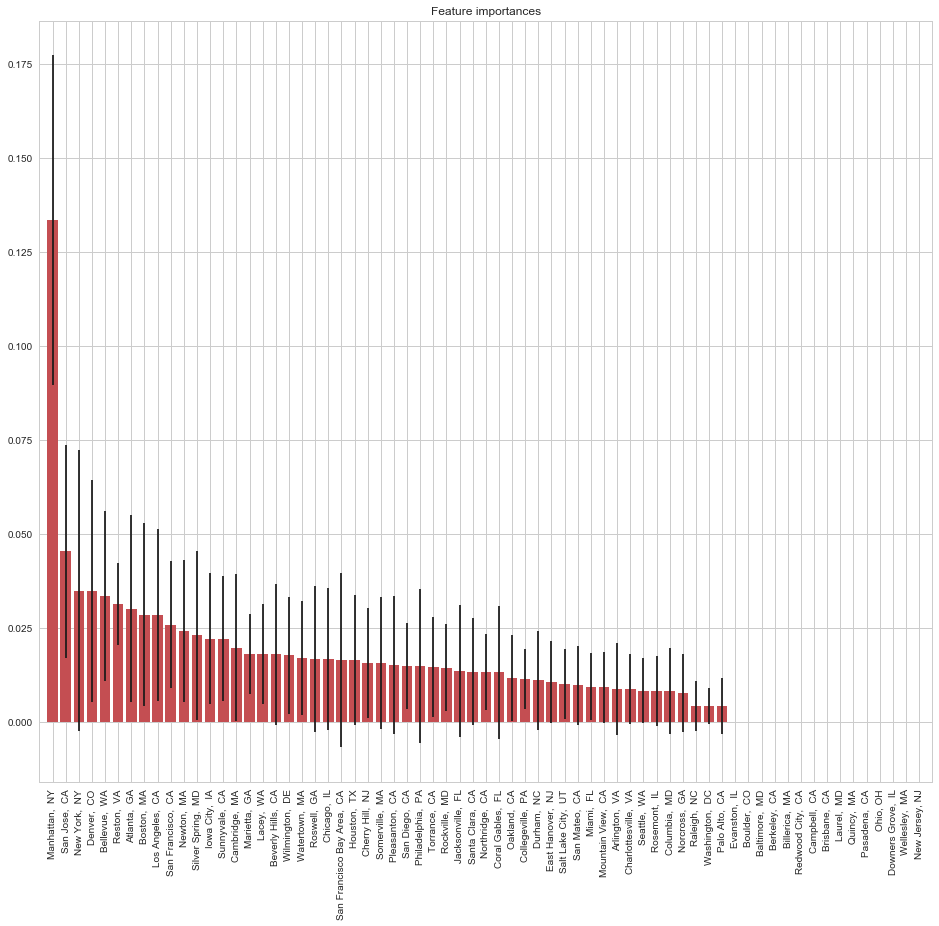

In [570]:
#looking at feature importance for location in random forest
all(rf.feature_importances_ == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])

In [ ]:
#Note that whether or not a job is in DC is not a good predictor of salary ...
 #median salary is 117.5k for dataset
    #median salary for DC is ~108k. so it would make sense that it would have jobs nearly equally above and below 
    #median ...

In [573]:
#putting feature importances into a pandas dataframe, indexed by location, labeling the column "importance," and
#sorting in descending order of feature importance
#then printing out first 10 hits, aka 10 most important features
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = dumb_location.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head(10)
##according to our (not great) random forest classifier, what cities are the best predictors of whether a salary
##is above or below the median? Essentially, in which cities are jobs solidly in one bin or the other?


importance
Manhattan,  NY        0.133458
San Jose,  CA         0.045377
New York,  NY         0.034986
Denver,  CO           0.034975
Bellevue,  WA         0.033558
Reston,  VA           0.031405
Atlanta,  GA          0.030142
Boston,  MA           0.028579
Los Angeles,  CA      0.028395
San Francisco,  CA    0.025953

In [484]:
sns.set(style = "whitegrid", color_codes = True)

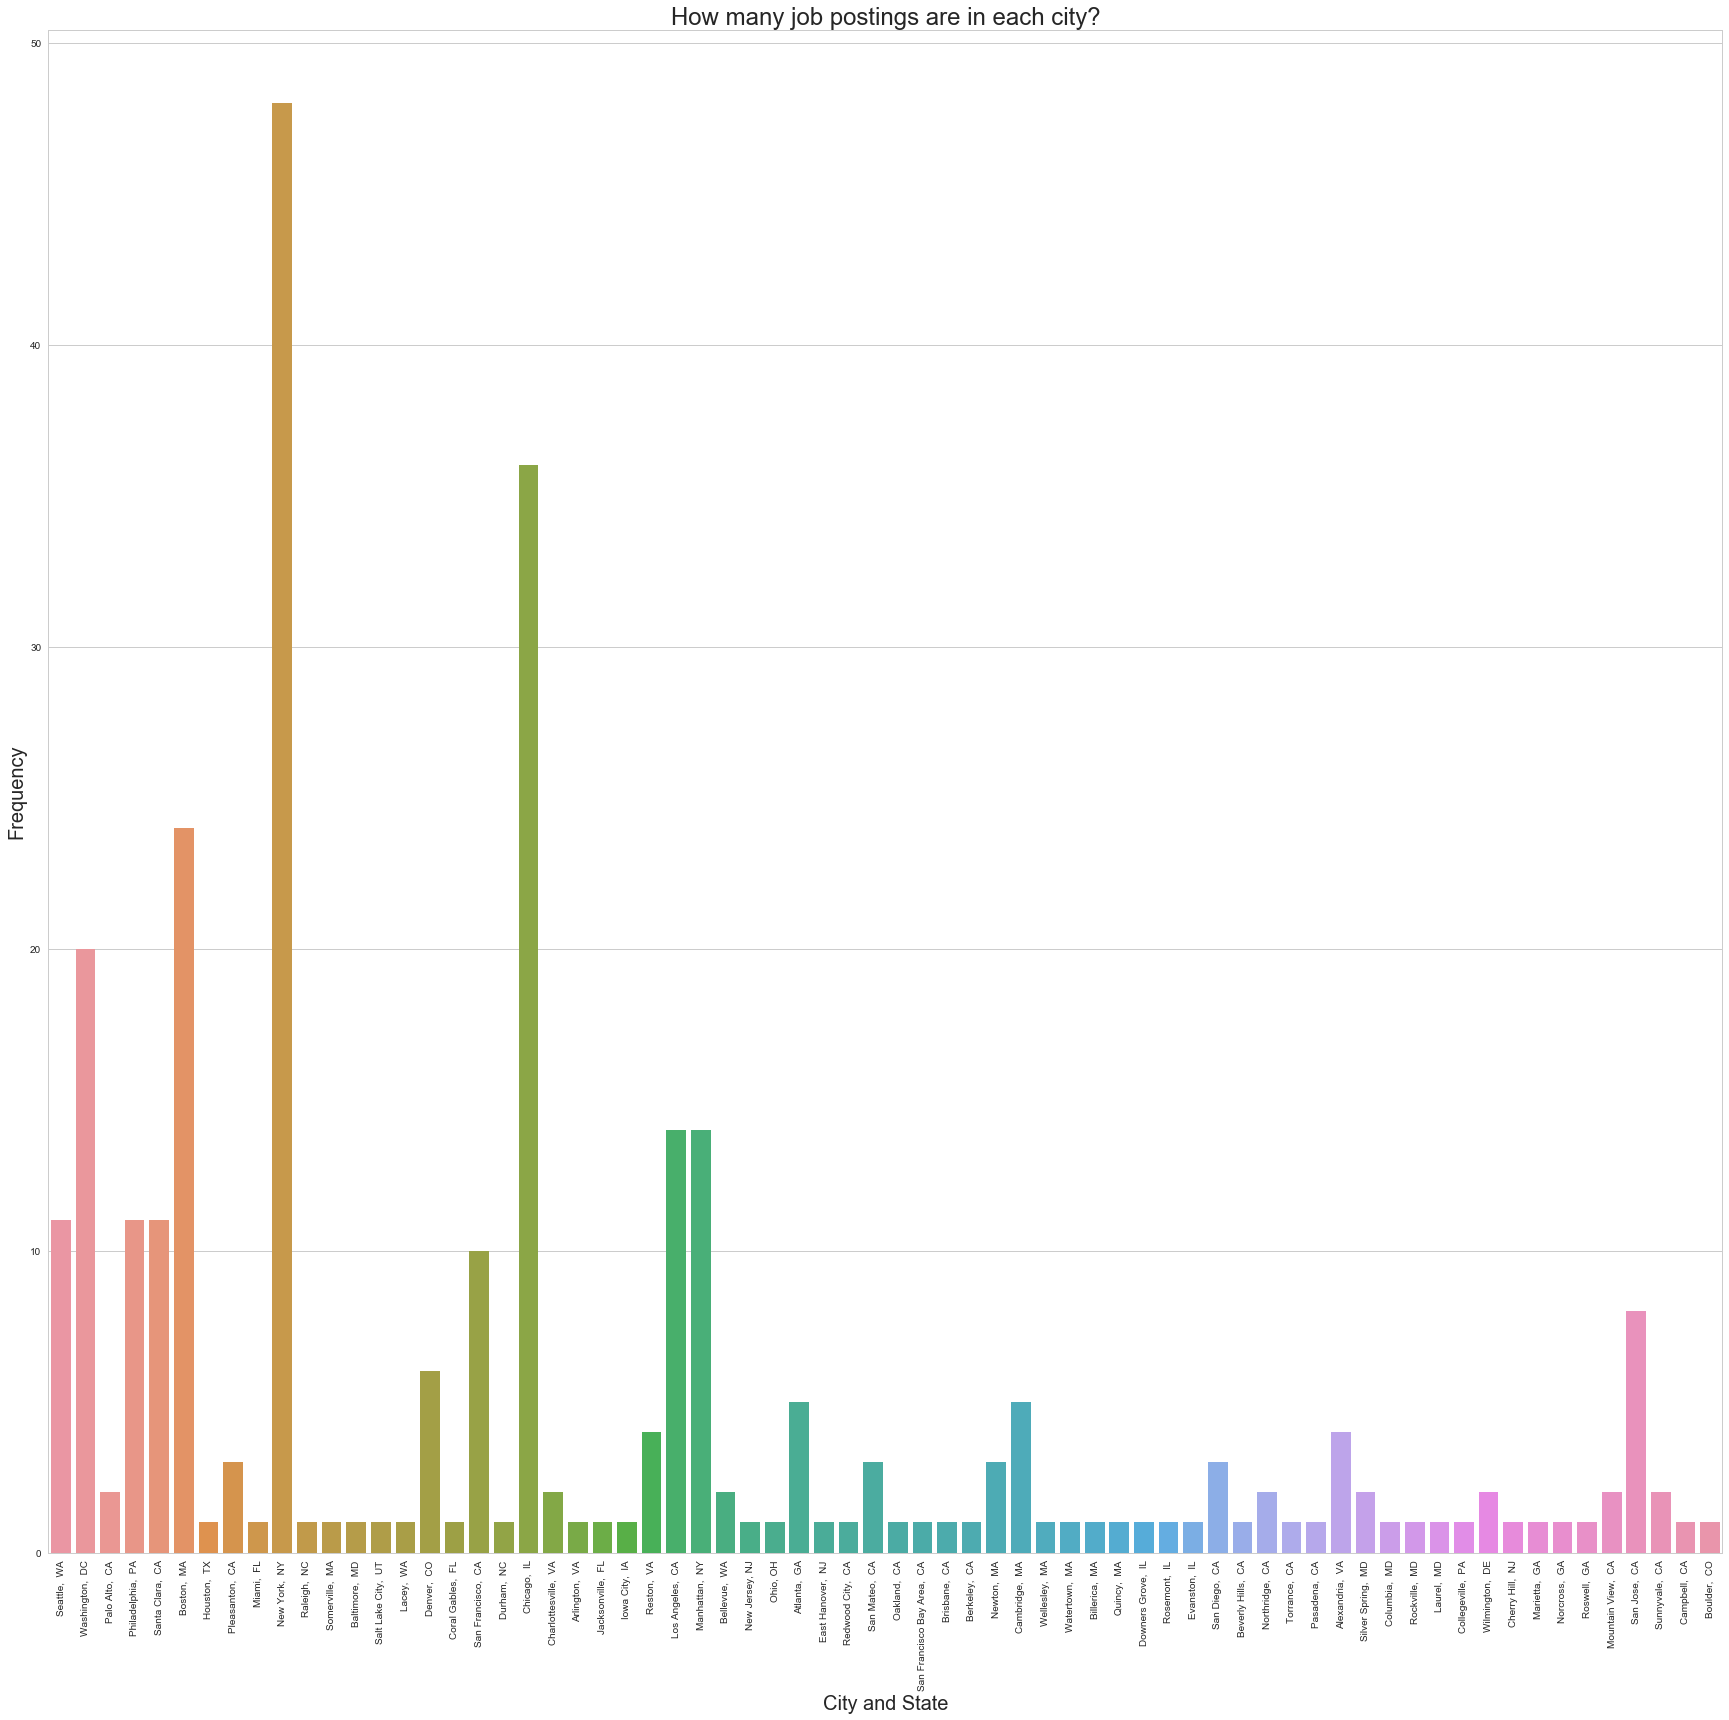

In [543]:
sns.countplot(x = "location", data = big_spender)
plt.xlabel("City and State", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.title("How many job postings are in each city?", fontsize = 24)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (30, 28)

### LOGISTIC REGRESSION (USING ONLY LOCATION)

Let's build a new model, using logistic regression instead of Random Forest as the classifier, and with the same features, to see how the two models compare

In [511]:
from sklearn.linear_model import LogisticRegression

In [547]:
lr = LogisticRegression()

In [585]:
X_train_scaled = mms.fit_transform(X_train) #scaaaling the data. already instantiated a scaler above, in RF bit

In [586]:
lr.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [587]:
X_test_scaled = mms.transform(X_test)

In [588]:
lr.score(X_test_scaled, y_test) #better than cross-validated RF, basically the same as non-cv RF?

0.59595959595959591

In [589]:
y_pred = lr.predict(X_test_scaled)

In [590]:
confusion_matrix(y_test, y_pred)

array([[27, 24],
       [16, 32]])

In [591]:
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.63      0.53      0.57        51
          1       0.57      0.67      0.62        48

avg / total       0.60      0.60      0.59        99



In [554]:
##Not  a marked improvement, we need to add some better/more predictive features!

#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title 
- or whether 'Manager' is in the title. 
- Then build a new Random Forest with these features. Do they add any value? 


In [595]:
big_spender_mod.to_csv("big_spender_with_dum.csv", index = False, encoding = "utf-8")

In [596]:
big_spender_mod

title                                                company                     location  salary                                                                                                                                                          description                    city state  coded_sal  Arlington,  VA  Atlanta,  GA  Baltimore,  MD  Bellevue,  WA  Berkeley,  CA  Beverly Hills,  CA  Billerica,  MA  Boston,  MA  Boulder,  CO  Brisbane,  CA  Cambridge,  MA  Campbell,  CA       ...         Reston,  VA  Rockville,  MD  Rosemont,  IL  Roswell,  GA  Salt Lake City,  UT  San Diego,  CA  San Francisco Bay Area,  CA  San Francisco,  CA  San Jose,  CA  San Mateo,  CA  Santa Clara,  CA  Seattle,  WA  Silver Spring,  MD  Somerville,  MA  Sunnyvale,  CA  Torrance,  CA  Washington,  DC  Watertown,  MA  Wellesley,  MA  Wilmington,  DE
96                                                     Data Scientist                                              NxT Level                 Seattle,  WA  142500                            We are looking for a passionate Data Scientists that are looking to deep dive into a Seattle, WA company that's growing exponentially....                 Seattle    WA          1               0             0               0              0              0                   0               0            0             0              0               0              0       ...                   0               0              0             0                    0               0                            0                   0              0               0                 0             1                   0                0               0              0                0               0               0                0
129                                                    Data Scientist                            Central Intelligence Agency              Washington,  DC   91066      Data Scientists organize and interpret Big Data to inform US decision makers, drive successful operations and shape CIA technology and resource investments....              Washington    DC          0               0             0               0              0              0                   0               0            0             0              0               0              0       ...                   0               0              0             0                    0               0                            0                   0              0               0                 0             0                   0                0               0              0                1               0               0                0
145                                                    Data Scientist                                                   Keyo               Palo Alto,  CA  160000  We’re looking for talented junior and senior data scientists to join our diverse and fast-growing data team. As a data scientist, you’ll build and implement the...               Palo Alto    CA          1               0             0               0              0              0                   0               0            0             0              0               0              0       ...                   0               0              0             0                    0               0                            0                   0              0               0                 0             0                   0                0               0              0                0               0               0                0
176                                                    Data Scientist                       Computer Enterprises, Inc. (CEI)            Philadelphia,  PA  160000                       Excel, SQL, SAS, R, and Tableau) through determination of appropriate analytic approach (sample data analysis, trending, regression, etc.)....            Philadelphia    PA          1               0             0               0       

In [597]:
big_spender[big_spender.title != "Data Scientist"]

title                                                company                     location  salary                                                                                                                                                          description                    city state  coded_sal
184                              Software Engineer - Machine Learning                                              NxT Level                 Seattle,  WA  117500               MS or PhD degree in Computer Science, Artificial Intelligence, Machine Learning, or related technical field. Exceptional project management skills....                 Seattle    WA          0
188                         Principal Software Engineer, Data Science                                      MatchPointe Group             Santa Clara,  CA  125000                             Scientific Programming experience with Python – Numpy / Pandas / SciKitlearn / Matplotlib. Principal Software Engineer, Data Science....             Santa Clara    CA          1
259             Principle Scientist, Data Science, System integration                                      MatchPointe Group             Santa Clara,  CA  125000                       Principal Scientist, Data Science, System Integration. Develop a Bio-Physics understanding of the root mechanisms behind the data analysis....             Santa Clara    CA          1
325                                     Data Scientist II, Sequencing                                      Enterprise Select              Pleasanton,  CA  120000  The successful candidate must be excited about learning new concepts from chemistry, physics, algorithm development and electrical engineering and applying them...              Pleasanton    CA          1
342                                         Machine Learning Engineer                                         CTI Consulting                   Miami,  FL  120000    Experience applying machine learning techniques to noisy, uncertain and/or dynamic data sets. Design and implementation of machine learning software solutions...                   Miami    FL          1
442                                            Technical Data Analyst                                       Sharp Action LLC              Somerville,  MA   72500                                                  Put data models (from data scientist) into production. Automate data scrubbing for machine learning model input....              Somerville    MA          0
470                                Senior Analyst, Advanced Analytics                                         Liberty Mutual                  Boston,  MA   94100    You will also support these data scientists in manual scoring of data for some deployed complex models. There is also the opportunity to learn to build simple...                  Boston    MA          0
507                                           Data & Research Analyst                                            The Council              Washington,  DC   82500                        Identify key macro and micro trends in the industry through robust research, leveraging data and analytics to produce meaningful insights....              Washington    DC          0
543                                             Research Data Analyst                               Johns Hopkins University               Baltimore,  MD   51114     If you are interested in applying for employment with The Johns Hopkins University and require special assistance or accommodation during any part of the pre...               Baltimore    MD          0
549                                                 Sr Data Scientist                                                   PMES                New York,  NY  155000                                 Data manipulation and analysis using SQL, noSQL, Java, C, SAS, and machine learning suites such as Mahout, Weka, and RapidMiner:....                New York    NY          1
633             

In [601]:
def senior_living(string):
    if "Senior" in string:
        return 1
    elif "SENIOR" in string:
        return 1
    elif "Sr " in string:
        return 1
    elif "SR " in string:
        return 1
    else:
        return 0

In [602]:
big_spender_mod["is_senior"] = big_spender_mod.apply(lambda row: senior_living(row["title"]), axis = 1)
# big_spender["coded_sal"] = big_spender.apply(lambda row: sal_encoder(row["salary"]), axis = 1)

In [603]:
big_spender_mod

title                                                company                     location  salary                                                                                                                                                          description                    city state  coded_sal  Arlington,  VA  Atlanta,  GA  Baltimore,  MD  Bellevue,  WA  Berkeley,  CA  Beverly Hills,  CA  Billerica,  MA  Boston,  MA  Boulder,  CO  Brisbane,  CA  Cambridge,  MA  Campbell,  CA    ...      Rockville,  MD  Rosemont,  IL  Roswell,  GA  Salt Lake City,  UT  San Diego,  CA  San Francisco Bay Area,  CA  San Francisco,  CA  San Jose,  CA  San Mateo,  CA  Santa Clara,  CA  Seattle,  WA  Silver Spring,  MD  Somerville,  MA  Sunnyvale,  CA  Torrance,  CA  Washington,  DC  Watertown,  MA  Wellesley,  MA  Wilmington,  DE  is_senior
96                                                     Data Scientist                                              NxT Level                 Seattle,  WA  142500                            We are looking for a passionate Data Scientists that are looking to deep dive into a Seattle, WA company that's growing exponentially....                 Seattle    WA          1               0             0               0              0              0                   0               0            0             0              0               0              0    ...                   0              0             0                    0               0                            0                   0              0               0                 0             1                   0                0               0              0                0               0               0                0          0
129                                                    Data Scientist                            Central Intelligence Agency              Washington,  DC   91066      Data Scientists organize and interpret Big Data to inform US decision makers, drive successful operations and shape CIA technology and resource investments....              Washington    DC          0               0             0               0              0              0                   0               0            0             0              0               0              0    ...                   0              0             0                    0               0                            0                   0              0               0                 0             0                   0                0               0              0                1               0               0                0          0
145                                                    Data Scientist                                                   Keyo               Palo Alto,  CA  160000  We’re looking for talented junior and senior data scientists to join our diverse and fast-growing data team. As a data scientist, you’ll build and implement the...               Palo Alto    CA          1               0             0               0              0              0                   0               0            0             0              0               0              0    ...                   0              0             0                    0               0                            0                   0              0               0                 0             0                   0                0               0              0                0               0               0                0          0
176                                                    Data Scientist                       Computer Enterprises, Inc. (CEI)            Philadelphia,  PA  160000                       Excel, SQL, SAS, R, and Tableau) through determination of appropriate analytic approach (sample data analysis, trending, regression, etc.)....            Philadelphia    PA          1               0             0               0              0              0         

In [604]:
def engine_engine(string):
    if "Engineer" in string:
        return 1
    elif "ENGINGEER" in string:
        return 1
    else:
        return 0

In [605]:
big_spender_mod["is_engineer"] = big_spender.apply(lambda row: engine_engine(row["title"]), axis = 1)

In [607]:
def HAL(string):
    if "Machine Learning" in string:
        return 1
    elif "MACHINE LEARNING" in string:
        return 1
    else:
        return 0

In [608]:
big_spender_mod["is_ML"] = big_spender.apply(lambda row: HAL(row["title"]), axis = 1)

In [609]:
big_spender_mod

title                                                company                     location  salary                                                                                                                                                          description                    city state  coded_sal  Arlington,  VA  Atlanta,  GA  Baltimore,  MD  Bellevue,  WA  Berkeley,  CA  Beverly Hills,  CA  Billerica,  MA  Boston,  MA  Boulder,  CO  Brisbane,  CA  Cambridge,  MA  Campbell,  CA  ...    Roswell,  GA  Salt Lake City,  UT  San Diego,  CA  San Francisco Bay Area,  CA  San Francisco,  CA  San Jose,  CA  San Mateo,  CA  Santa Clara,  CA  Seattle,  WA  Silver Spring,  MD  Somerville,  MA  Sunnyvale,  CA  Torrance,  CA  Washington,  DC  Watertown,  MA  Wellesley,  MA  Wilmington,  DE  is_senior  is_engineer  is_ML
96                                                     Data Scientist                                              NxT Level                 Seattle,  WA  142500                            We are looking for a passionate Data Scientists that are looking to deep dive into a Seattle, WA company that's growing exponentially....                 Seattle    WA          1               0             0               0              0              0                   0               0            0             0              0               0              0  ...               0                    0               0                            0                   0              0               0                 0             1                   0                0               0              0                0               0               0                0          0            0      0
129                                                    Data Scientist                            Central Intelligence Agency              Washington,  DC   91066      Data Scientists organize and interpret Big Data to inform US decision makers, drive successful operations and shape CIA technology and resource investments....              Washington    DC          0               0             0               0              0              0                   0               0            0             0              0               0              0  ...               0                    0               0                            0                   0              0               0                 0             0                   0                0               0              0                1               0               0                0          0            0      0
145                                                    Data Scientist                                                   Keyo               Palo Alto,  CA  160000  We’re looking for talented junior and senior data scientists to join our diverse and fast-growing data team. As a data scientist, you’ll build and implement the...               Palo Alto    CA          1               0             0               0              0              0                   0               0            0             0              0               0              0  ...               0                    0               0                            0                   0              0               0                 0             0                   0                0               0              0                0               0               0                0          0            0      0
176                                                    Data Scientist                       Computer Enterprises, Inc. (CEI)            Philadelphia,  PA  160000                       Excel, SQL, SAS, R, and Tableau) through determination of appropriate analytic approach (sample data analysis, trending, regression, etc.)....            Philadelphia    PA          1               0             0               0              0              0                   0               0            0             0      

In [610]:
big_spender_mod.coded_sal.corr(big_spender_mod.is_senior) #correlation  b/e salary and whether "senior" is in title

0.11049340690122471

In [611]:
big_spender_mod.salary.corr(big_spender_mod.is_senior)
#interesting, correlation is stronger when we look at continuous salary data ...

0.18470522236706813

In [612]:
big_spender_mod.coded_sal.corr(big_spender_mod.is_engineer) ##engineer is more informative than "senior"

0.22763913761531937

In [614]:
big_spender_mod.salary.corr(big_spender_mod.is_engineer) #continuous salary less strong than for 0/1 salary. hm

0.17486977849245874

In [613]:
big_spender_mod.coded_sal.corr(big_spender_mod.is_ML) ##machine learning, like engineer, is relatively informative

0.22488350051577993

In [615]:
big_spender_mod.salary.corr(big_spender_mod.is_ML) #continuous salary slightly better than 0/1 ..

0.22907136762878672

#### Rebuild this model with the new variables
- You can either create the dummy features manually or use the `dmatrix` function from `patsy`
- Remember to scale the feature variables as well!


In [ ]:
#'Berkeley,  CA'

In [618]:
print big_spender_mod.columns

Index([                      u'title',                     u'company',                    u'location',                      u'salary',                 u'description',                        u'city',                       u'state',                   u'coded_sal',              u'Arlington,  VA',                u'Atlanta,  GA',              u'Baltimore,  MD',               u'Bellevue,  WA',               u'Berkeley,  CA',          u'Beverly Hills,  CA',              u'Billerica,  MA',                 u'Boston,  MA',                u'Boulder,  CO',               u'Brisbane,  CA',              u'Cambridge,  MA',               u'Campbell,  CA',        u'Charlottesville,  VA',            u'Cherry Hill,  NJ',                u'Chicago,  IL',           u'Collegeville,  PA',               u'Columbia,  MD',           u'Coral Gables,  FL',                 u'Denver,  CO',          u'Downers Grove,  IL',                 u'Durham,  NC',           u'East Hanover,  NJ',               u'Evanston,  IL',
 

In [653]:
y = big_spender_mod["coded_sal"]

In [654]:
# df1.drop(['B', 'C'], axis=1)
X = big_spender_mod.drop(["title", "company", "location", "coded_sal", "salary", "description", "city", "state"], axis = 1)

In [655]:
X.head()

Arlington,  VA  Atlanta,  GA  Baltimore,  MD  Bellevue,  WA  Berkeley,  CA  Beverly Hills,  CA  Billerica,  MA  Boston,  MA  Boulder,  CO  Brisbane,  CA  Cambridge,  MA  Campbell,  CA  Charlottesville,  VA  Cherry Hill,  NJ  Chicago,  IL  Collegeville,  PA  Columbia,  MD  Coral Gables,  FL  Denver,  CO  Downers Grove,  IL  ...    Roswell,  GA  Salt Lake City,  UT  San Diego,  CA  San Francisco Bay Area,  CA  San Francisco,  CA  San Jose,  CA  San Mateo,  CA  Santa Clara,  CA  Seattle,  WA  Silver Spring,  MD  Somerville,  MA  Sunnyvale,  CA  Torrance,  CA  Washington,  DC  Watertown,  MA  Wellesley,  MA  Wilmington,  DE  is_senior  is_engineer  is_ML
96                0             0               0              0              0                   0               0            0             0              0               0              0                     0                 0             0                  0              0                  0            0                   0  ...               0                    0               0                            0                   0              0               0                 0             1                   0                0               0              0                0               0               0                0          0            0      0
129               0             0               0              0              0                   0               0            0             0              0               0              0                     0                 0             0                  0              0                  0            0                   0  ...               0                    0               0                            0                   0              0               0                 0             0                   0                0               0              0                1               0               0                0          0            0      0
145               0             0               0              0              0                   0               0            0             0              0               0              0                     0                 0             0                  0              0                  0            0                   0  ...               0                    0               0                            0                   0              0               0                 0             0                   0                0               0              0                0               0               0                0          0            0      0
176               0             0               0              0              0                   0               0            0             0              0               0              0                     0                 0             0                  0              0                  0            0                   0  ...               0                    0               0                            0                   0              0               0                 0             0                   0                0               0              0                0               0               0                0          0            0      0
184               0             0               0              0              0                   0               0            0             0              0               0              0                     0                 0             0                  0              0                  0            0                   0  ...               0                    0               0                            0                   0              0               0                 0             1                   0                0               0              0                0               0               0                0          0            1      1

[5 rows x 70 columns

In [656]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 6)

In [657]:
X_train_scaled = mms.fit_transform(X_train)

In [658]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [659]:
X_test_scaled = mms.transform(X_test)

In [660]:
y_pred = rf.predict(X_test_scaled)

In [661]:
confusion_matrix(y_test, y_pred)

array([[39,  9],
       [23, 19]])

In [662]:
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.63      0.81      0.71        48
          1       0.68      0.45      0.54        42

avg / total       0.65      0.64      0.63        90



In [663]:
accuracy_score(y_test, y_pred)

0.64444444444444449

In [664]:
scores = cross_val_score(rf, X_test_scaled, y_test)

In [665]:
scores.mean()

0.68888888888888877

(-1, 70)

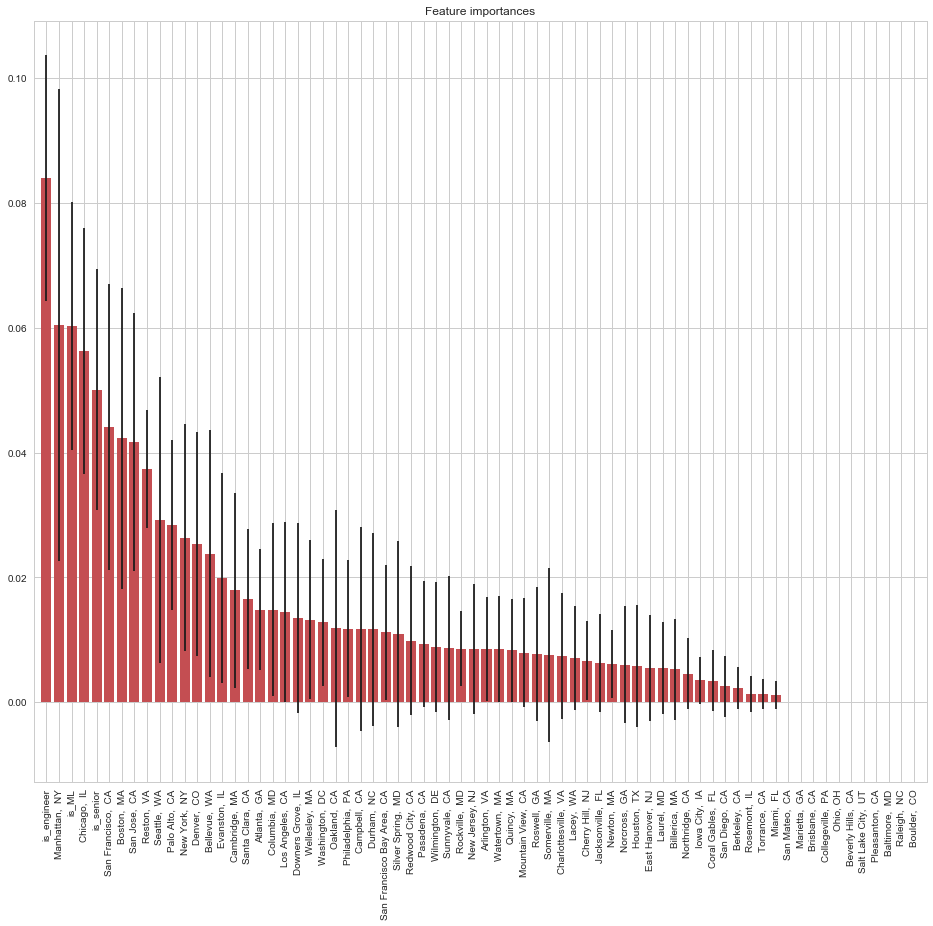

In [668]:
#looking at feature importance for location in random forest
all(rf.feature_importances_ == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])

In [671]:
#putting feature importances into a pandas dataframe, indexed by location, labeling the column "importance," and
#sorting in descending order of feature importance
#then printing out first 10 hits, aka 10 most important features
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head(10)
#interesting ...


importance
is_engineer           0.084003
Manhattan,  NY        0.060409
is_ML                 0.060235
Chicago,  IL          0.056277
is_senior             0.050098
San Francisco,  CA    0.044087
Boston,  MA           0.042307
San Jose,  CA         0.041642
Reston,  VA           0.037366
Seattle,  WA          0.029201

### LOGISTIC REGRESSION, MORE FEATURES

In [666]:
LR = LogisticRegression()

In [667]:
LR.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [669]:
y_pred = LR.predict(X_test_scaled)

In [672]:
confusion_matrix(y_test, y_pred)

array([[32, 16],
       [21, 21]])

In [674]:
print classification_report(y_test, y_pred) #ugh things don't get better ... 

             precision    recall  f1-score   support

          0       0.60      0.67      0.63        48
          1       0.57      0.50      0.53        42

avg / total       0.59      0.59      0.59        90



In [675]:
accuracy_score(y_test, y_pred)

0.58888888888888891

In [676]:
scores = cross_val_score(LR, X_test_scaled, y_test)

In [677]:
scores.mean() 

0.66666666666666663

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy of the model. 

In [679]:
#big_spender_mod.head()

In [681]:
X = big_spender_mod[["is_senior", "is_engineer", "is_ML", "Manhattan,  NY", "Chicago,  IL", "San Francisco,  CA", 
                     "Boston,  MA", "San Jose,  CA", "Reston,  VA", "Seattle,  WA"]]

In [683]:
exp_var = X.copy()

In [682]:
y = big_spender_mod["coded_sal"]

In [684]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

In [685]:
X_train_scaled = mms.fit_transform(X_train)

In [686]:
X_test_scaled = mms.transform(X_test)

In [687]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [688]:
y_pred = rf.predict(X_test_scaled)

In [692]:
from sklearn.metrics import confusion_matrix

In [693]:
confusion_matrix(y_test, y_pred)

array([[38, 12],
       [19, 21]])

In [695]:
print classification_report(y_test, y_pred) #slightly better

             precision    recall  f1-score   support

          0       0.67      0.76      0.71        50
          1       0.64      0.53      0.58        40

avg / total       0.65      0.66      0.65        90



In [696]:
accuracy_score(y_test, y_pred)

0.65555555555555556

In [707]:
scores = cross_val_score(rf, X_test_scaled, y_test)
scores.mean()

0.55446792732665928

In [708]:
scores = cross_val_score(rf, X_train_scaled, y_train) # ... which one do I want?
scores.mean()

0.6071083505866115

In [689]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head(10)

importance
Manhattan,  NY        0.185869
is_ML                 0.157548
is_engineer           0.154224
Boston,  MA           0.107998
Seattle,  WA          0.088263
is_senior             0.076617
Chicago,  IL          0.070266
San Francisco,  CA    0.065360
Reston,  VA           0.052150
San Jose,  CA         0.041704

In [709]:
lr = LogisticRegression()

In [710]:
lr.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [711]:
y_pred = lr.predict(X_test_scaled)

In [712]:
confusion_matrix(y_test, y_pred)

array([[36, 14],
       [19, 21]])

In [714]:
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.65      0.72      0.69        50
          1       0.60      0.53      0.56        40

avg / total       0.63      0.63      0.63        90



In [715]:
accuracy_score(y_test, y_pred)

0.6333333333333333

In [716]:
scores = cross_val_score(lr, X_test_scaled, y_test)
scores.mean()

0.55446792732665928

#### Continue to incorporate other text features from the title or summary that you believe will predict the salary and examine their coefficients

#### Take ~100 scraped entries with salaries. Convert them to use with your model and predict the salary - which entries have the highest predicted salaries?

### BONUS 

#### Bonus: Use Count Vectorizer from scikit-learn to create features from the text summaries. 
- Examine using count or binary features in the model
- Re-evaluate your models using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [806]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [807]:
TI = TfidfVectorizer(stop_words = "english")

In [808]:
Xti = big_spender_mod["description"]

In [809]:
yti = big_spender_mod["coded_sal"]

In [868]:
X_train, X_test, y_train, y_test = train_test_split(Xti, yti, test_size = 0.4, random_state = 14)

In [869]:
TI.fit(X_train)

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [870]:
DFti = pd.DataFrame(TI.transform(X_train).todense(), 
                    columns = TI.get_feature_names())

In [871]:
DFti.transpose().sort_values(0, ascending=False).head(10).transpose()

acquisition  background   logging  emphasis  instrumentation  preferably  programmer  hardware  programming    strong
0       0.321301    0.321301  0.321301  0.321301         0.321301    0.321301    0.297613  0.297613     0.280807  0.233432
1       0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
2       0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
3       0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
4       0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
5       0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
6       0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
7       0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
8       0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
9       0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
10      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
11      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
12      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
13      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
14      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
15      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
16      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
17      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
18      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
19      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
20      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
21      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
22      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.243138
23      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.270739  0.000000     0.000000  0.000000
24      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
25      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
26      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
27      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
28      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
29      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
30      0.000000    0.000000  0.000000  0.000000         0.000000    0.000000    0.000000  0.000000     0.000000  0.000000
31      0.000000    0.000000  0.000000  0.000000         0.000000    

In [872]:
DFti.shape #1337 words in vectorizer dictionary

(179, 975)

In [873]:
DFti.columns

Index([u'10', u'100k', u'110', u'130k', u'180k', u'2010', u'220k', u'401k', u'abilities', u'ability',
       ...
       u'ways', u'web', u'work', u'working', u'works', u'world', u'write', u'writing', u'years', u'yrs'], dtype='object', length=975)

In [874]:
DFtest = pd.DataFrame(TI.transform(X_test).todense(), 
                    columns = TI.get_feature_names())

In [875]:
X_test.head()

99              As a Data Scientist in our Operational Analytics team, you lead and manage a team of data scientists ultimately responsible for driving our company's...
7065    SENIOR DATA SCIENTIST ARTIFICIAL INTELLIGENCE (AI)*. Relocation available to San Jose, California for those with Ph.D.’s in computer science/engineering with...
4662                Mission & Service Los Angeles, CA Gavin de Becker & Associates is a dynamic security firm innovating threat assessment and public figure protection.
188                             Scientific Programming experience with Python – Numpy / Pandas / SciKitlearn / Matplotlib. Principal Software Engineer, Data Science....
473                                                       The Office of Data Reporting & Analysis is recruiting for two (2) City Research Scientists II, to function....
Name: description, dtype: object

In [876]:
DFtest.transpose().sort_values(0, ascending=False).transpose()

team  ultimately   driving    manage      lead  responsible   company  analytics  scientists      data  scientist  plan  platform  player      plus  pipelines  pipeline  physiological  piper  political ...   exclusively    expand  expanding  experience  experienced    expert  eyebrow  expertise   experts  exploitation  exploration  explore  exponentially  express  extensive  external  extracting  extraction  extremely  yrs
0    0.395141    0.393843  0.393843  0.344206  0.315171     0.315171  0.259803   0.232627    0.202346  0.166497   0.161920   0.0  0.000000     0.0  0.000000   0.000000  0.000000            0.0    0.0        0.0 ...           0.0  0.000000        0.0    0.000000     0.000000  0.000000      0.0   0.000000  0.000000           0.0          0.0      0.0            0.0      0.0    0.00000       0.0         0.0    0.000000        0.0  0.0
1    0.000000    0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   0.000000    0.000000  0.080521   0.156615   0.0  0.000000     0.0  0.000000   0.000000  0.000000            0.0    0.0        0.0 ...           0.0  0.000000        0.0    0.000000     0.000000  0.000000      0.0   0.000000  0.000000           0.0          0.0      0.0            0.0      0.0    0.00000       0.0         0.0    0.000000        0.0  0.0
2    0.000000    0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   0.0  0.000000     0.0  0.000000   0.000000  0.000000            0.0    0.0        0.0 ...           0.0  0.000000        0.0    0.000000     0.000000  0.000000      0.0   0.000000  0.000000           0.0          0.0      0.0            0.0      0.0    0.00000       0.0         0.0    0.000000        0.0  0.0
3    0.000000    0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   0.000000    0.000000  0.099902   0.000000   0.0  0.000000     0.0  0.000000   0.000000  0.000000            0.0    0.0        0.0 ...           0.0  0.000000        0.0    0.217366     0.000000  0.000000      0.0   0.000000  0.000000           0.0          0.0      0.0            0.0      0.0    0.00000       0.0         0.0    0.000000        0.0  0.0
4    0.000000    0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   0.000000    0.242036  0.099577   0.000000   0.0  0.000000     0.0  0.000000   0.000000  0.000000            0.0    0.0        0.0 ...           0.0  0.000000        0.0    0.000000     0.000000  0.000000      0.0   0.000000  0.000000           0.0          0.0      0.0            0.0      0.0    0.00000       0.0         0.0    0.000000        0.0  0.0
5    0.000000    0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   0.000000    0.000000  0.146186   0.000000   0.0  0.000000     0.0  0.288188   0.000000  0.000000            0.0    0.0        0.0 ...           0.0  0.000000        0.0    0.159035     0.000000  0.000000      0.0   0.000000  0.000000           0.0          0.0      0.0            0.0      0.0    0.00000       0.0         0.0    0.000000        0.0  0.0
6    0.000000    0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   0.000000    0.000000  0.132927   0.000000   0.0  0.000000     0.0  0.000000   0.000000  0.000000            0.0    0.0        0.0 ...           0.0  0.000000        0.0    0.000000     0.000000  0.000000      0.0   0.000000  0.000000           0.0          0.0      0.0            0.0      0.0    0.00000       0.0         0.0    0.000000        0.0  0.0
7    0.000000    0.000000  0.000000  0.000000  0.316938     0.000000  0.000000   0.000000    0.000000  0.167430   0.000000   0.0  0.000000     0.0  0.000000   0.000000  0.000000            0.0    0.0        0.0 ...           0.0  0.000000        0.0    0.000000     0.000000  0.000000      0.0   0.000000  0.000000           0.0          0.0      0.0            0.0      0.0    0.00000       0.0         0.0    0.000000        0.0  0.0
8    0.000000    0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   0.00

In [877]:
DFtest.shape

(120, 975)

In [878]:
LRti = LogisticRegression()

In [879]:
LRti.fit(DFti, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [880]:
TIpredicts = LRti.predict(DFtest)

In [881]:
TIpredicts

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0])

In [882]:
accuracy_score(y_test, TIpredicts)

0.68333333333333335

In [825]:
from sklearn.feature_extraction.text import CountVectorizer

In [826]:
thecount = CountVectorizer(stop_words = "english")

In [827]:
XX = big_spender_mod["description"]

In [828]:
yy = big_spender_mod["coded_sal"]

In [829]:
XXtrain, XXtest, yytrain, yytest = train_test_split(XX, yy, test_size = 0.35)

In [830]:
thecount.fit(XXtrain)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [832]:
DFtrain = pd.DataFrame(thecount.transform(XXtrain).todense(),
             columns=thecount.get_feature_names())


In [833]:
DFtrain.transpose().sort_values(0, ascending=False).head(10).transpose()

algorithm  data  real  sensor  machine  performance  processing  analysis  eo  assess
0            2     2     1       1        1            1           1         1   1       1
1            0     1     0       0        0            0           1         0   0       0
2            0     0     0       0        1            0           0         0   0       0
3            0     0     0       0        0            0           0         0   0       0
4            0     1     0       0        0            0           0         0   0       0
5            0     1     0       0        0            0           0         1   0       0
6            0     1     0       0        0            0           0         0   0       0
7            0     4     0       0        0            0           0         0   0       0
8            0     1     0       0        0            0           0         0   0       0
9            0     0     0       0        0            0           0         0   0       0
10           0     3     0       0        0            0           0         0   0       0
11           0     0     0       0        0            0           0         0   0       0
12           0     1     0       0        0            0           0         0   0       0
13           0     0     0       0        0            0           0         0   0       0
14           0     1     0       0        0            0           0         0   0       0
15           0     1     0       0        0            0           1         0   0       0
16           0     2     0       0        0            0           0         0   0       0
17           1     0     0       0        0            0           0         0   0       0
18           0     2     0       0        0            0           0         0   0       0
19           0     2     0       0        0            0           0         1   0       0
20           0     2     0       0        0            0           0         0   0       0
21           0     2     0       0        0            0           0         0   0       0
22           0     1     0       0        0            0           0         0   0       0
23           0     2     0       0        0            0           0         1   0       0
24           0     2     0       0        0            0           0         0   0       0
25           0     1     0       0        0            0           0         1   0       0
26           0     0     0       0        0            0           0         0   0       0
27           0     1     0       0        0            0           0         0   0       0
28           0     2     0       0        0            0           0         0   0       0
29           0     3     0       0        0            0           0         0   0       0
30           0     0     0       0        0            0           0         0   0       0
31           0     3     0       0        0            0           0         0   0       0
32           0     2     0       0        0            0           0         0   0       0
33           0     0     0       0        0            0           0         0   0       0
34           0     2     0       0        1            0           0         0   0       0
35           0     3     0       0        0            1           1         0   0       0
36           0     0     0       0        0            0           0         0   0       0
37           0     2     0       0        0            0           0         0   0       0
38           0     4     0       0        0            0           0         0   0       0
39           0     3     0       0        0            0           0         0   0       0
40           0     3     0       0        1            0           0         0   0       0
41           0     1     0       0        0            0           0         1   0       0
42           0     2     0       0        1            0           1         0   0       0
4

In [834]:
DFtrain.shape

(194, 1023)

In [835]:
DFtest  = pd.DataFrame(thecount.transform(XXtest).todense(),
             columns=thecount.get_feature_names())


In [836]:
DFtest.transpose().sort_values(0, ascending=False).head(10).transpose()

preparation  large  extraction  scale  solutions  deep  data  applications  learning  play
0              1      1           1      1          1     1     1             1         1     0
1              0      1           0      0          0     0     2             0         0     0
2              0      0           0      0          0     0     1             0         1     0
3              0      0           0      0          0     0     3             0         0     0
4              0      0           0      0          0     0     1             0         0     0
5              0      1           0      0          0     0     2             0         0     0
6              0      0           0      0          0     0     0             0         0     0
7              0      0           0      0          0     0     1             0         0     0
8              0      0           0      0          0     0     4             0         0     0
9              0      0           0      0          0     0     1             0         0     0
10             0      0           0      0          0     0     2             1         1     0
11             0      0           0      0          0     0     1             0         0     0
12             0      0           0      0          0     0     2             0         0     0
13             0      0           0      0          0     0     1             0         0     0
14             0      0           0      0          0     0     4             0         0     0
15             0      0           0      0          0     0     2             0         0     0
16             0      0           0      0          0     0     2             0         0     0
17             0      0           0      0          0     0     1             0         0     0
18             0      0           0      0          0     0     1             0         0     0
19             0      0           0      0          0     0     2             0         0     0
20             0      0           0      0          0     0     3             0         0     0
21             0      0           0      0          0     0     3             0         0     0
22             0      1           0      0          0     0     2             0         0     0
23             0      0           0      0          0     0     1             0         0     0
24             0      0           0      0          0     0     1             0         0     0
25             0      0           0      0          0     0     2             0         0     0
26             0      0           0      0          0     0     0             0         0     0
27             0      0           0      0          0     0     1             0         0     0
28             0      0           0      0          0     0     1             0         0     0
29             0      0           0      0          0     0     2             0         0     0
30             0      0           0      0          0     0     1             0         1     0
31             0      0           0      0          0     0     1             0         0     0
32             0      0           1      0          0     0     2             0         1     0
33             0      0           0      0          0     0     4             0         1     0
34             0      0           0      0          0     0     1             0         0     0
35             0      0           0      0          0     0     1             0         1     0
36             0      0           0      0          0     0     2             0         1     0
37             0      0           0      0          0     0     1             0         1     0
38             0      0           0      0          0     0     0             0         0     0
39             0      0           0      0          0     0     1             0         0     0
40             0      0           0      0          0     0     2    

In [837]:
lore = LogisticRegression()

In [838]:
lore.fit(DFtrain, yytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [839]:
lore.score(DFtest, yytest) #Holy Smokes, Batman

0.74285714285714288

In [ ]:
##Looks like NLP is great. Just looking at the descriptions gives us the best score so far!

In [842]:
yypred = lore.predict(DFtest)

In [843]:
confusion_matrix(yytest, yypred)

array([[43,  7],
       [20, 35]])

In [845]:
print classification_report(yytest, yypred)

             precision    recall  f1-score   support

          0       0.68      0.86      0.76        50
          1       0.83      0.64      0.72        55

avg / total       0.76      0.74      0.74       105



In [849]:
riff = RandomForestClassifier(class_weight = "balanced", n_jobs = -1)

In [850]:
riff.fit(DFtrain, yytrain)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [851]:
riff.score(DFtest, yytest) #not as good as logistic regression

0.61904761904761907

In [855]:
#big_spender_mod[big_spender_mod.description.str.contains("analysis")]

## Notes from Code Review: